# Indian Premier League

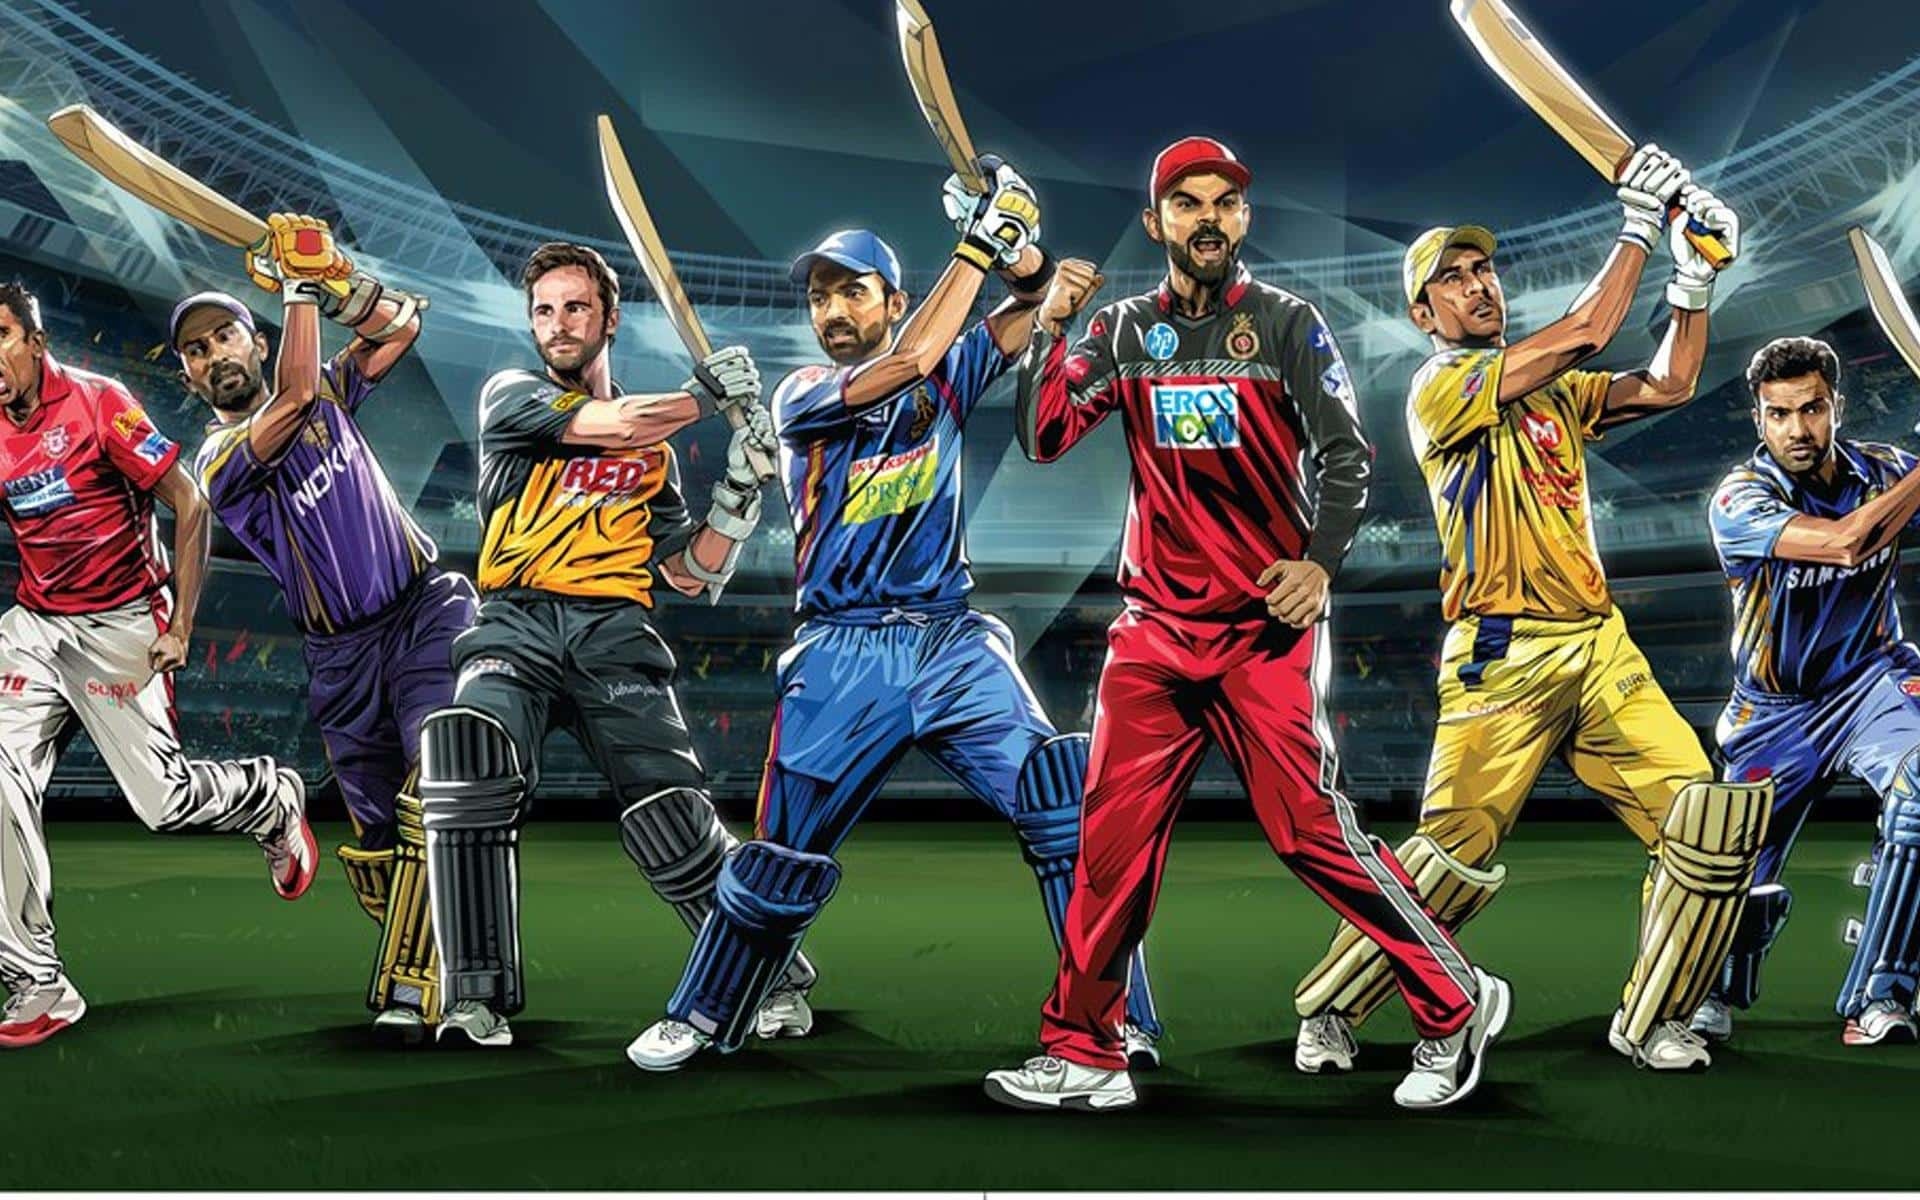

Aim:

● To perform Exploratory Data Analysis on the given dataset - Indian Premier League 2008-2022

● To find out the most successful teams, players and factors contributing win or loss of a team.

● To Suggest teams or players a company should endorse for its products.

● To use any tool of your choice like (Python/R/Tableau/PowerBI/Excel/SAP/SAS) - I personally used Python.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
from textblob import TextBlob
from wordcloud import WordCloud
import random
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# List of variables
**Information about some variables used in the Data Set.**

**1st "matches" Dataset**

- id: The IPL match id.
- season: The IPL season
- city: The city where the IPL match was held.
- date: The date on which the match was held.
- team1: One of the teams of the IPL match
- team2: The other team of the IPL match
- toss_winner: The team that won the toss
- toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
- result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
- dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
- winner: The winner of the match.
- win_by_runs: Provides the runs by which the team batting first won
- win_by_wickets: Provides the number of wickets by which the team batting second won.
- player_of_match: The outstanding player of the match.
- venue: The venue where the match was hosted.


**2nd "deliveries" Dataset**

- match_id: Unique Identifier for a match
- inning: Match innings - 1st innings/2nd innings
- batting_team: Name of the batting team
- bowling_team: Name of the bowling team
- over: Current over
- ball: Current ball of the over
- batsman: Name of the batsman on strike
- non_striker: Name of the batsman on non-striker's end
- bowler: Name of the bowler
- is_super_over: Is this a super-over (0 or 1)
- wide_runs: Runs given as wide
- bye_runs: Runs given as bye
- legbye_runs: Runs given as leg-bye
- noball_runs: Runs given as no-ball
- penalty_runs: Runs given as penalty
- batsman_runs: Runs scored by the batsman
- extra_runs: Total extra runs (Wide, Bye, No-ball, Penalty)
- total_runs: Total runs from the ball (extra_runs, batsman_runs)
- player_dismissed: Name of the player dismissed (If out)
- dismissal_kind: How the player was dismissed (If out)
- fielder: Fielder involved in the dismissal (If any)



In [3]:
matches = pd.read_csv("E:\AIF Document\my sql\Matches.csv")

In [4]:
matches.head()

,ID,city,date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,5/29/2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,5/27/2022,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,5/25/2022,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,5/24/2022,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,5/22/2022,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   city             899 non-null    object 
 2   date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [6]:
deliveries = pd.read_csv("E:\AIF Document\my sql\Deliveries.csv")
deliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

# Data Cleaning

In [8]:
matches.isnull().sum()

ID                   0
city                51
date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [9]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


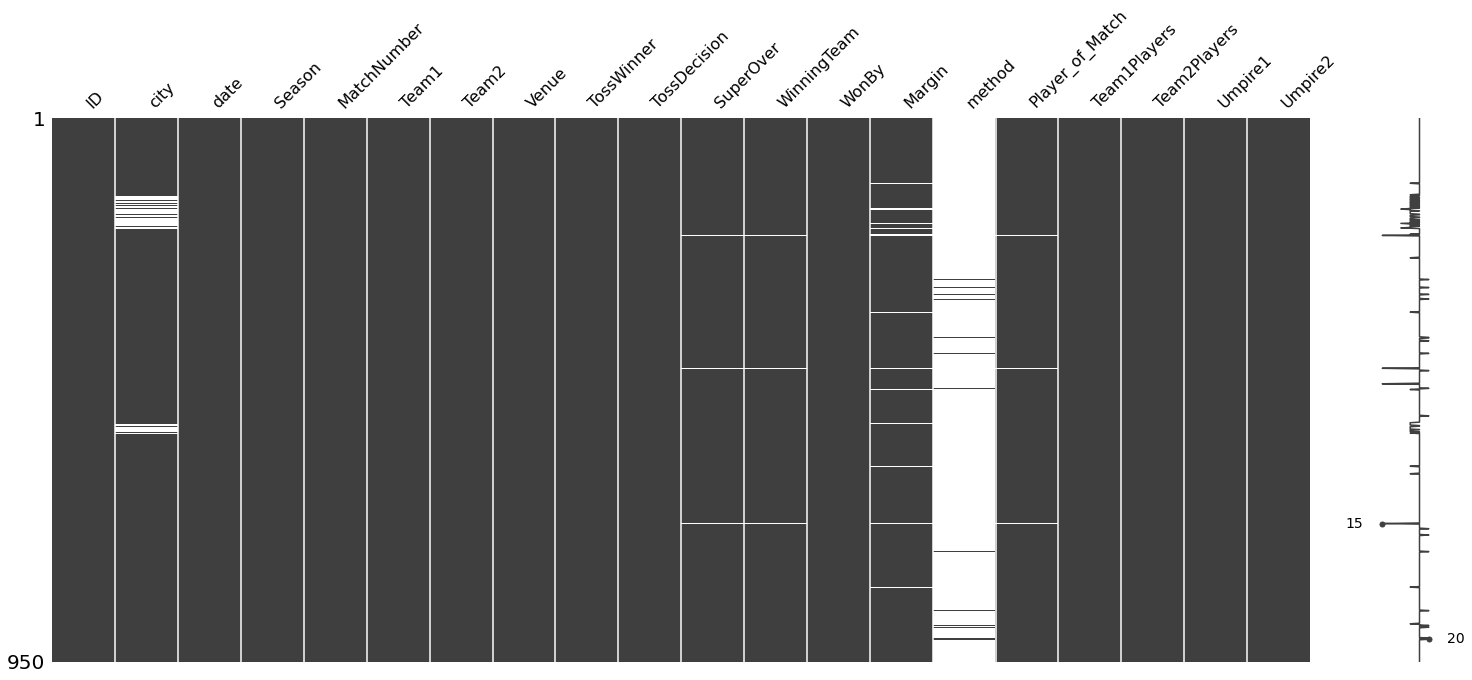

In [10]:
 # Observation of Missing Value of Data
import missingno as msno

msno.matrix(matches);

In [11]:
#Percentage of NAN Values 
per_Nan = [(c, matches[c].isna().mean()*100) for c in matches]
per_Nan = pd.DataFrame(per_Nan, columns=["column_name", "Percentage"])
per_Nan


,column_name,Percentage
0,ID,0.000000
1,city,5.368421
2,date,0.000000
3,Season,0.000000
4,MatchNumber,0.000000
5,Team1,0.000000
6,Team2,0.000000
7,Venue,0.000000
8,TossWinner,0.000000
9,TossDecision,0.000000


In [12]:
deliveries.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [13]:
matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [14]:
matches['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [15]:
deliveries['BattingTeam'].unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [16]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [17]:
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [18]:
matches.loc[matches['city'].isnull()]

,ID,city,date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,1237181,NaN,11/10/2020,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,NaN,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
137,1237177,NaN,11/5/2020,2020/21,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
138,1216495,NaN,11/3/2020,2020/21,56,Mumbai Indians,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,NaN,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth
140,1216530,NaN,11/1/2020,2020/21,54,Kolkata Knight Riders,Rajasthan Royals,Dubai International Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,60.0,NaN,PJ Cummins,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'SP ...","['RV Uthappa', 'BA Stokes', 'SPD Smith', 'SV S...",Nitin Menon,PR Reiffel
142,1216535,NaN,10/31/2020,2020/21,51,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,9.0,NaN,Ishan Kishan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['Ishan Kishan', 'Q de Kock', 'SA Yadav', 'SS ...",YC Barde,PR Reiffel
143,1216502,NaN,10/31/2020,2020/21,52,Royal Challengers Bangalore,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,5.0,NaN,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
145,1216536,NaN,10/29/2020,2020/21,49,Kolkata Knight Riders,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,NaN,RD Gaikwad,"['Shubman Gill', 'N Rana', 'SP Narine', 'RK Si...","['SR Watson', 'RD Gaikwad', 'AT Rayudu', 'MS D...",C Shamshuddin,RK Illingworth
147,1216524,NaN,10/27/2020,2020/21,47,Sunrisers Hyderabad,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Sunrisers Hyderabad,Runs,88.0,NaN,WP Saha,"['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...","['AM Rahane', 'S Dhawan', 'MP Stoinis', 'SO He...",AK Chaudhary,Nitin Menon
148,1216520,NaN,10/26/2020,2020/21,46,Kolkata Knight Riders,Kings XI Punjab,Sharjah Cricket Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,8.0,NaN,CH Gayle,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'KD ...","['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N P...",KN Ananthapadmanabhan,RK Illingworth
150,1216544,NaN,10/25/2020,2020/21,44,Royal Challengers Bangalore,Chennai Super Kings,Dubai International Cricket Stadium,Royal Challengers Bangalore,bat,N,Chennai Super Kings,Wickets,8.0,NaN,RD Gaikwad,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RD Gaikwad', 'F du Plessis', 'AT Rayudu', 'M...",C Shamshuddin,RK Illingworth


In [19]:
matches['city'].fillna('Dubai', inplace = True)

In [20]:
matches['city'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

* 'Bangalore' and 'Bengaluru' These two are the same statement.

In [21]:
matches.replace('Bengaluru','Bangalore', inplace = True)

In [22]:
deliveries.replace('Bengaluru','Bangalore', inplace = True)

# Data Visualization

**1.Number of matches in the season.**

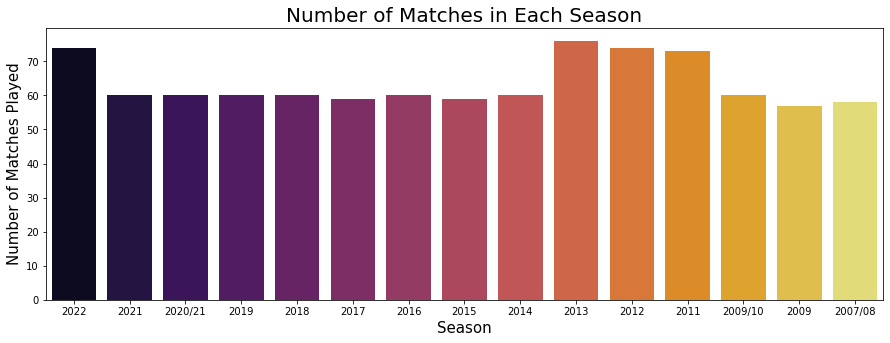

In [23]:
# lets see how many matches are being played every season
plt.subplots(figsize=(15,5))
sns.countplot(x = 'Season', data = matches, palette = 'inferno')
plt.xlabel('Season',fontsize=15)
plt.ylabel('Number of Matches Played',fontsize=15)
plt.title('Number of Matches in Each Season',fontsize=20)
plt.show()

* The most matches were played in 2013 and the least in 2009.

**2. Number of matches played by each team.**

In [24]:
num_matches = pd.concat([matches['Team1'], matches['Team2']])
num_matches = num_matches.value_counts()
num_matches

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiants         30
Punjab Kings                    28
Gujarat Titans                  16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
dtype: int64

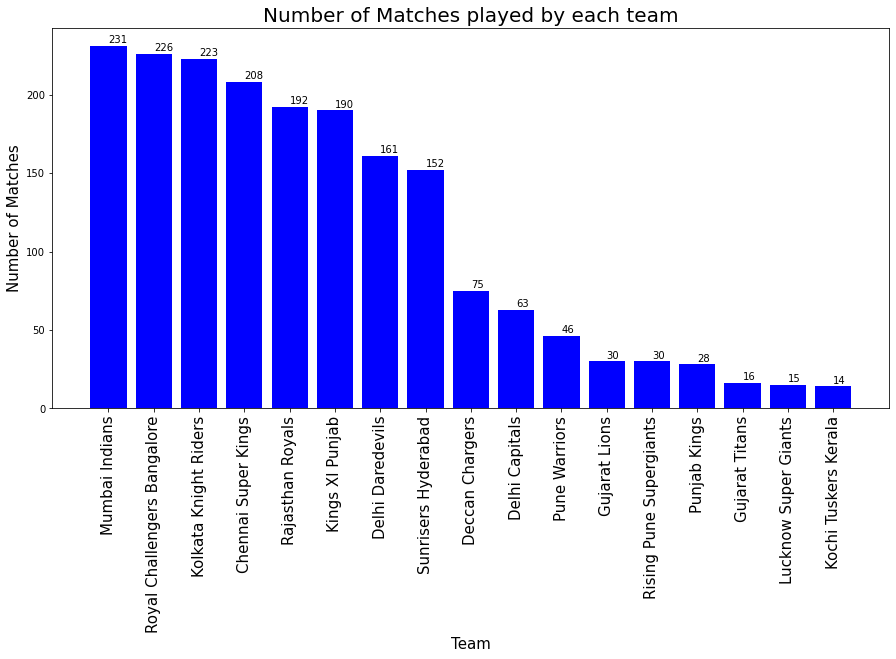

In [25]:
plt.figure(figsize=(15,7))
plt.bar(x=num_matches.index, height=num_matches.values,color='blue')
plt.title('Number of Matches played by each team',fontsize=20)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xticks(rotation=90,fontsize=15)

for i,v in enumerate(num_matches.values):
    plt.text(x=i, y=v+2, s=v)
    

* Maximum number of matches played by Mumbai Indians, Royal Challengers Bangalore, Kolkata Knight Riders.

**3. Total number of wins by each team**

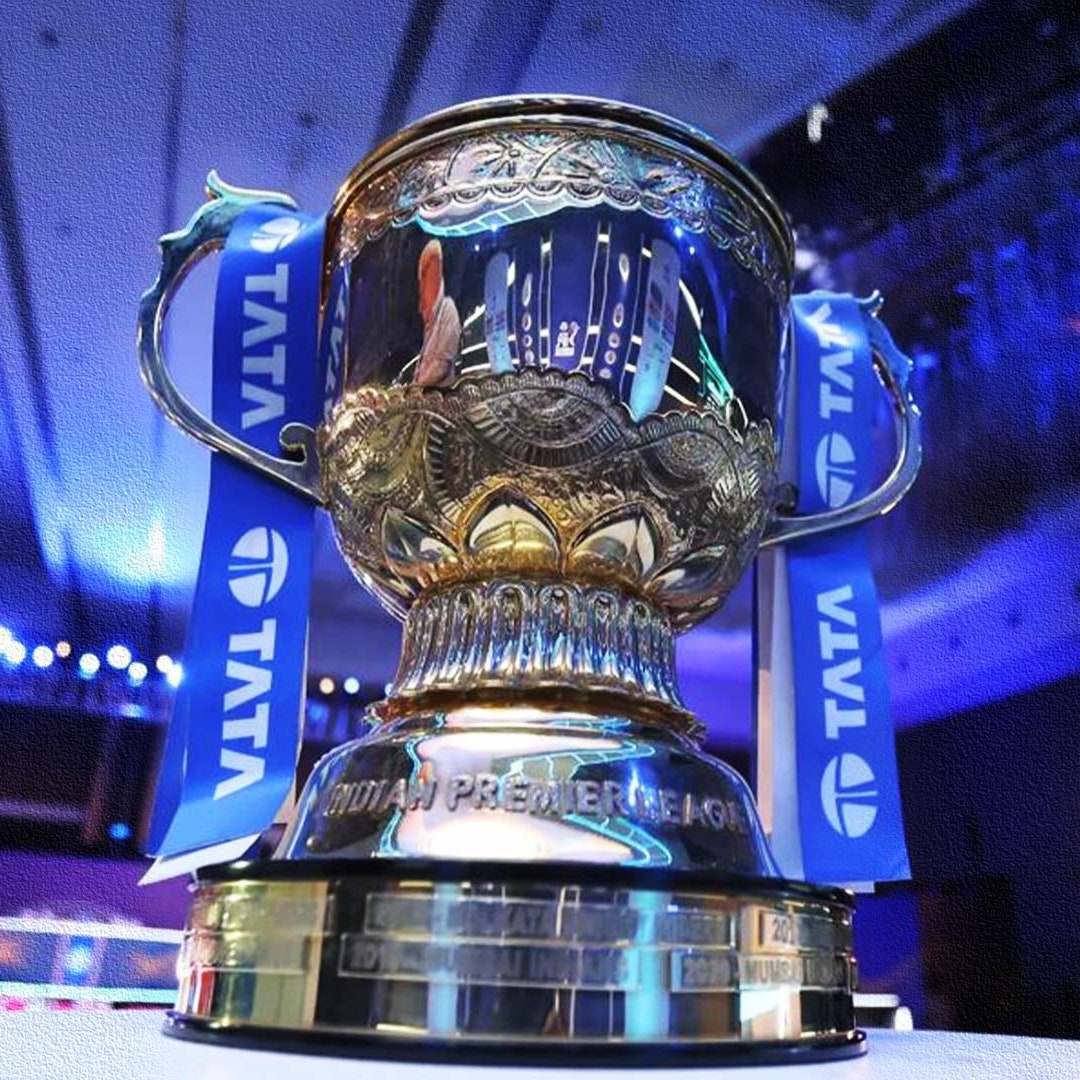

In [26]:
wins=pd.DataFrame(matches['WinningTeam'].value_counts())
wins

,WinningTeam
Mumbai Indians,131
Chennai Super Kings,121
Kolkata Knight Riders,114
Royal Challengers Bangalore,109
Rajasthan Royals,96
Kings XI Punjab,88
Sunrisers Hyderabad,75
Delhi Daredevils,67
Delhi Capitals,36
Deccan Chargers,29


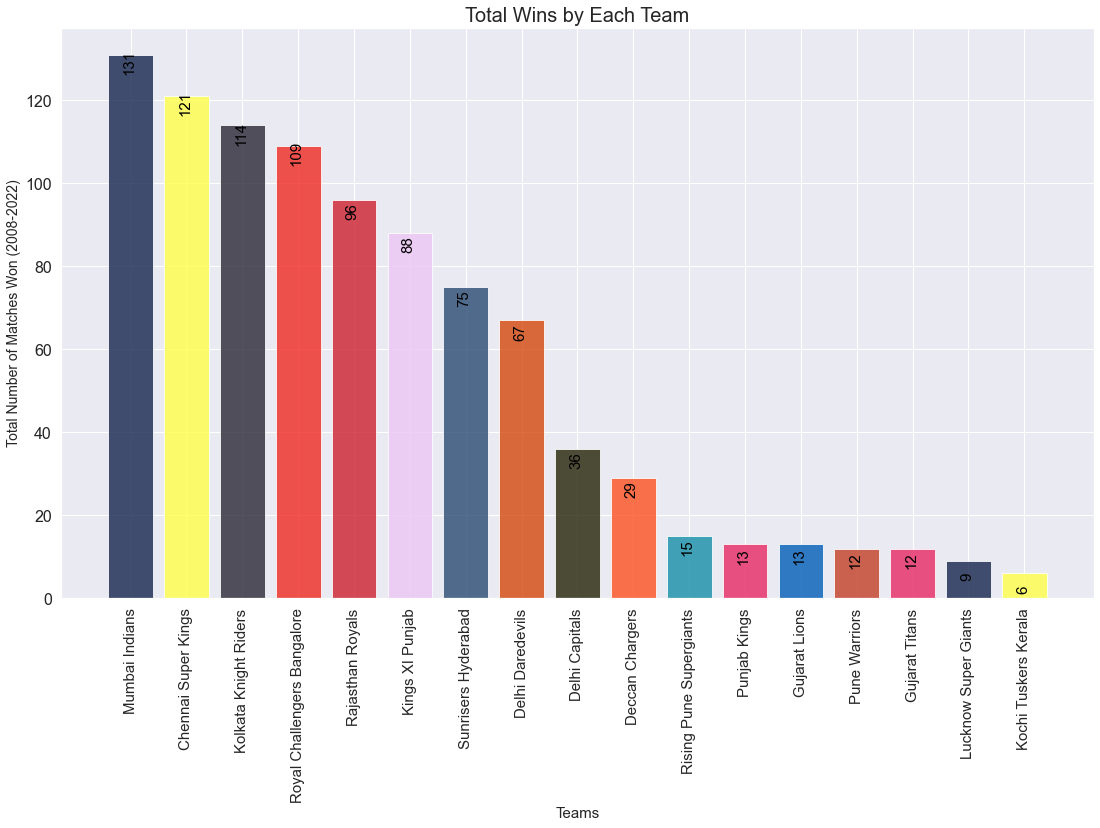

In [27]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(matches['WinningTeam'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['WinningTeam'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['WinningTeam']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total Wins by Each Team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total Number of Matches Won (2008-2022)',fontsize=14)
plt.show()

* Maximum number of matches played by Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders.

**4. Visualization of the total number of matches won by the teams for all seasons.**

In [28]:
winner_by_season = matches.groupby('Season')['WinningTeam'].value_counts()
winner_by_season

Season   WinningTeam          
2007/08  Rajasthan Royals         13
         Kings XI Punjab          10
         Chennai Super Kings       9
         Delhi Daredevils          7
         Mumbai Indians            7
                                  ..
2022     Punjab Kings              7
         Kolkata Knight Riders     6
         Sunrisers Hyderabad       6
         Chennai Super Kings       4
         Mumbai Indians            4
Name: WinningTeam, Length: 126, dtype: int64

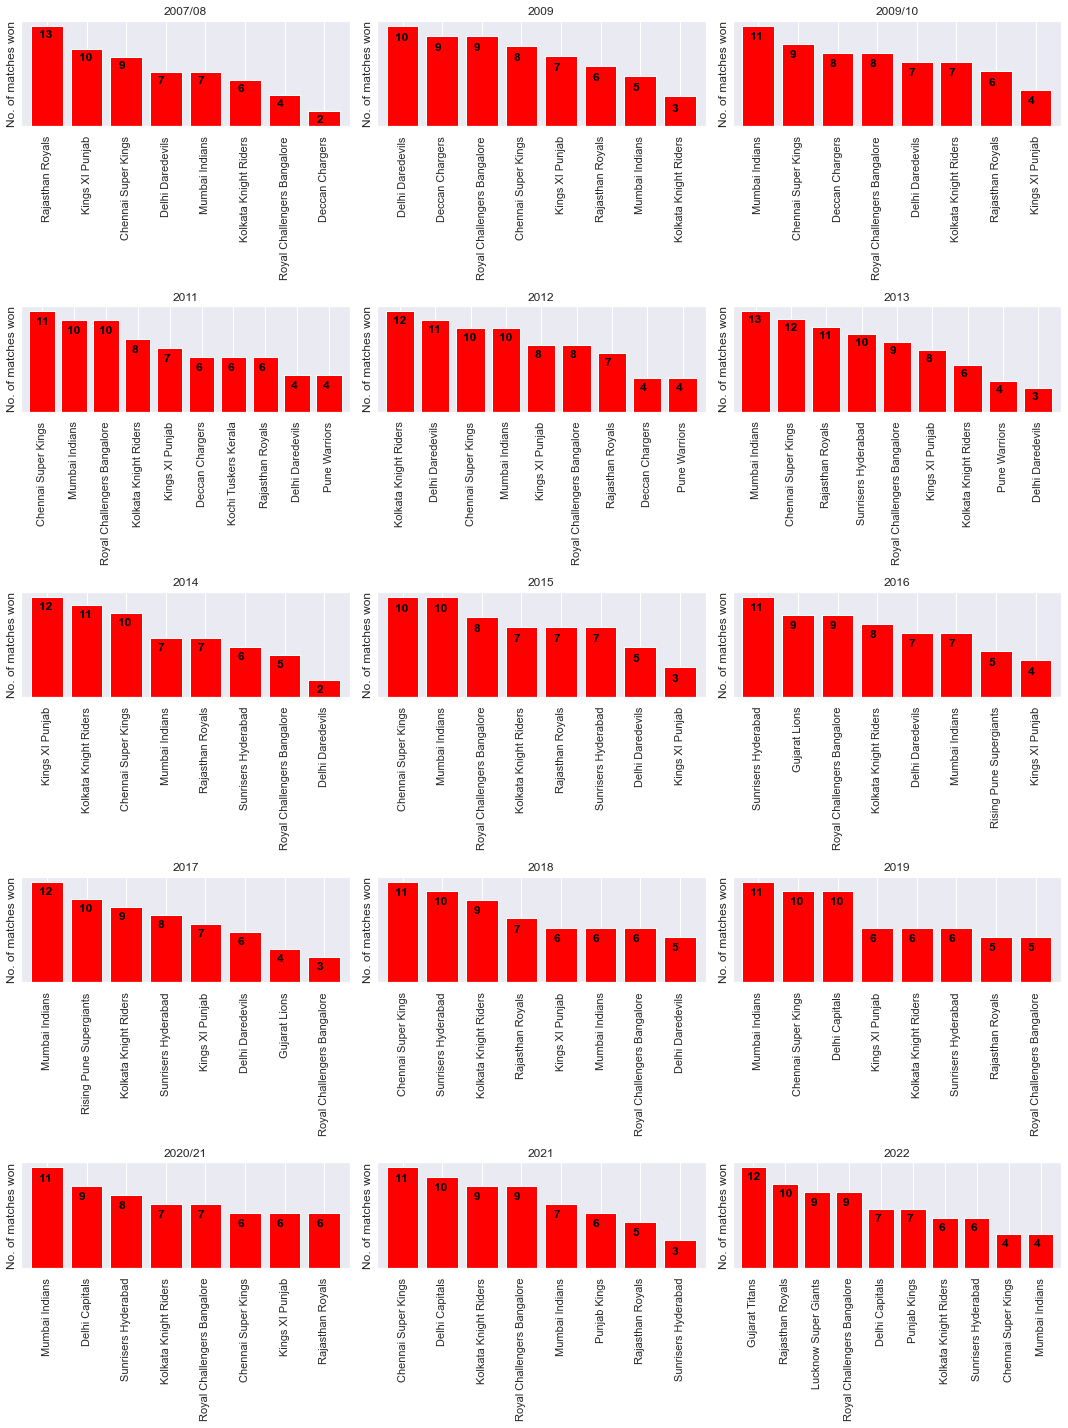

In [29]:
groups = winner_by_season.groupby('Season')
fig = plt.figure()
count = 1

for year, group in groups:
    ax = fig.add_subplot(5,3,count)
    ax.set_title(year)
    ax = group[year].plot.bar(figsize = (15,20), width = 0.8,color='red')
    
    count+=1;
    
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('No. of matches won')
    
    total_of_matches = []
    for i in ax.patches:
        total_of_matches.append(i.get_height())
    total = sum(total_of_matches)
    
    for i in ax.patches:
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="black",fontweight='bold')
plt.tight_layout()
plt.show()

**5. Champion in each season**

In [30]:
season_winner = matches.drop_duplicates('Season', keep='first')
season_winner = season_winner[['Season', 'WinningTeam']]
season_winner.sort_values('Season',inplace=True)
season_winner.reset_index(inplace=True, drop=True)
season_winner

,Season,WinningTeam
0,2007/08,Rajasthan Royals
1,2009,Deccan Chargers
2,2009/10,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


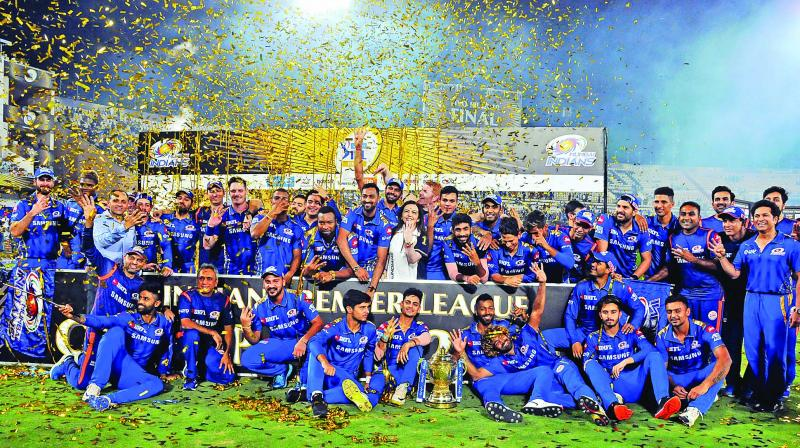
* The team with the most championships between the seasons of 2008-2022 is Mumbai Indians.

**6. Visualization of how many finals which team played and how many of these matches they won.**

In [31]:
finals = matches.drop_duplicates('Season', keep='first')
finals = finals[['Season', 'Team1', 'Team2', 'WinningTeam', ]]
finals

,Season,Team1,Team2,WinningTeam
0,2022,Rajasthan Royals,Gujarat Titans,Gujarat Titans
74,2021,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings
134,2020/21,Delhi Capitals,Mumbai Indians,Mumbai Indians
194,2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians
254,2018,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings
314,2017,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians
373,2016,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
433,2015,Mumbai Indians,Chennai Super Kings,Mumbai Indians
492,2014,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders
552,2013,Chennai Super Kings,Mumbai Indians,Mumbai Indians


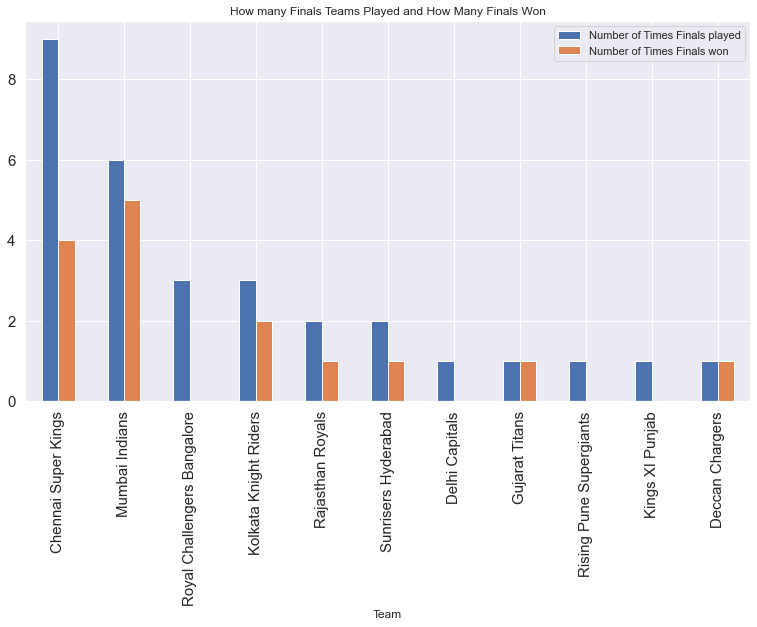

In [32]:
# Teams who reaches maximum number of finals
most_finals = pd.concat([finals['Team1'], finals['Team2']])
most_finals = most_finals.value_counts().reset_index()
most_finals = pd.DataFrame(most_finals)
most_finals.columns = ['Team', 'Number of Final']

# Teams who won the final.
win_finals = finals['WinningTeam'].value_counts().reset_index()
win_finals = pd.DataFrame(win_finals,)

most_finals = most_finals.merge(win_finals, left_on='Team',right_on='index', how='outer')
most_finals.drop('index', axis=1,inplace=True)
most_finals.set_index('Team', drop=True, inplace=True)
most_finals.columns = ['Number of Times Finals played', 'Number of Times Finals won']
most_finals.plot(kind='bar', figsize=(13,7),fontsize=15, title='How many Finals Teams Played and How Many Finals Won')
plt.show()

* Although Chennai Super Kings played a lot of finals, their ability to win the final match is low.

* Mumbai Indians won the most in the finals.

**7. Visualizing the number of matches held in each city.**

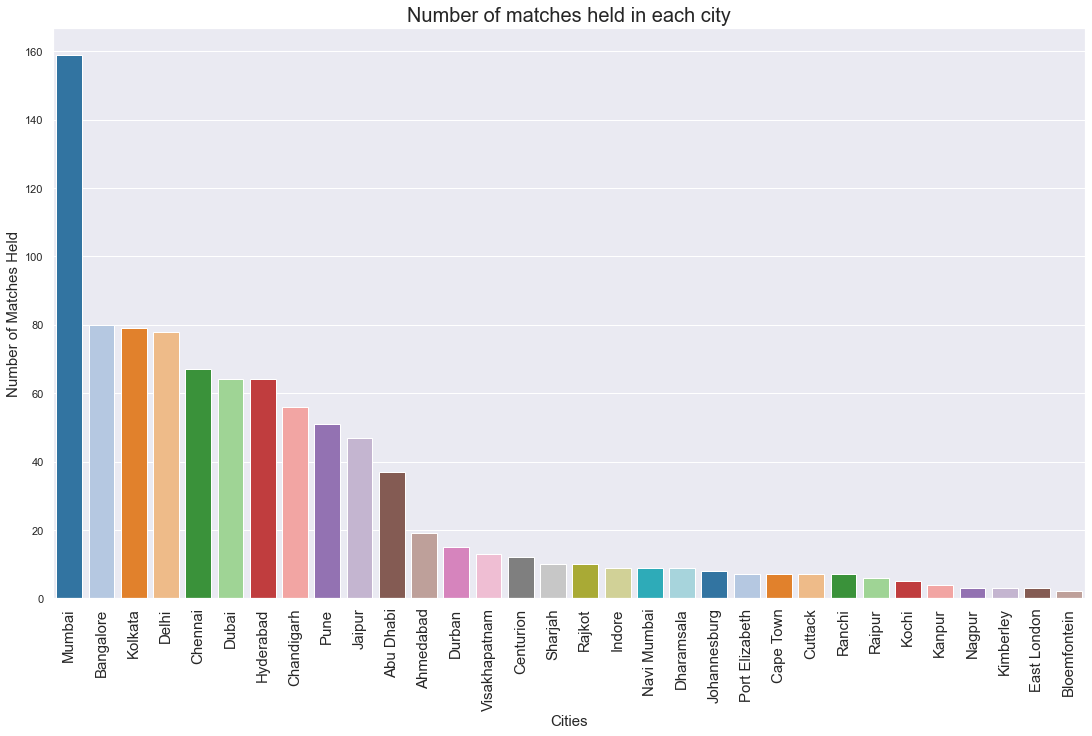

In [33]:
# Visualizing how many matches were played in which city.
plt.subplots(figsize=(18.5,10.5))
sns.countplot(x = 'city', data = matches, palette = 'tab20', order=matches['city'].value_counts().index)
plt.ylabel('Number of Matches Held',fontsize=15)
plt.title('Number of matches held in each city',fontsize=20)
plt.xlabel('Cities',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.show()

* Mumbai was observed as the city with the most played.
* Other favorite cities are Bangalore, Kolkate, Delhi.

In [34]:
# Picking the top 10 players based on the no. of Man of Match (MOM) awards won
mom=matches['Player_of_Match'].value_counts()[:10]
mom

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

**8. Plot to visualise the top 10 players based on the number of MOM awards won**

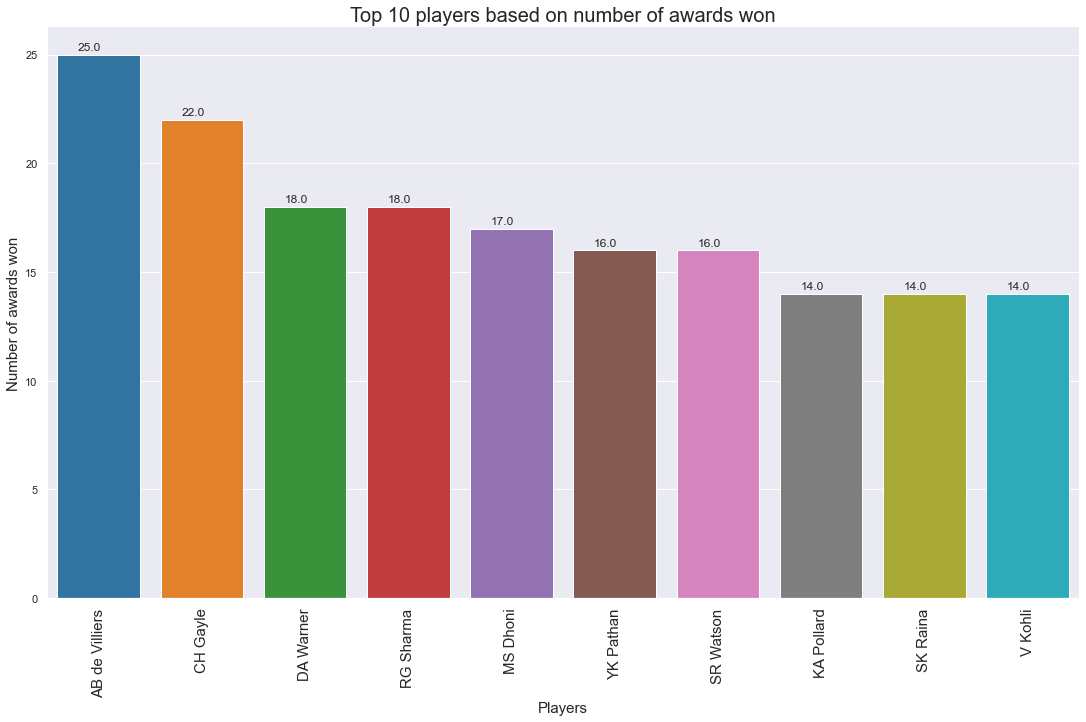

In [35]:
# Plot to visualise the top 10 players based on the number of MOM awards won
plt.subplots(figsize=(18.5,10.5))
ax = sns.barplot(x = mom.index, y = mom,orient='v', palette = 'tab10')
plt.ylabel('Number of awards won',fontsize=15)
plt.title('Top 10 players based on number of awards won',fontsize=20)
plt.xlabel('Players',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.2))       
plt.show()

* AB de Villiers is the player with the most man of the match award.
* It is followed by CH Gayle.

**9. Visualizing the number of matches held in each venues.**

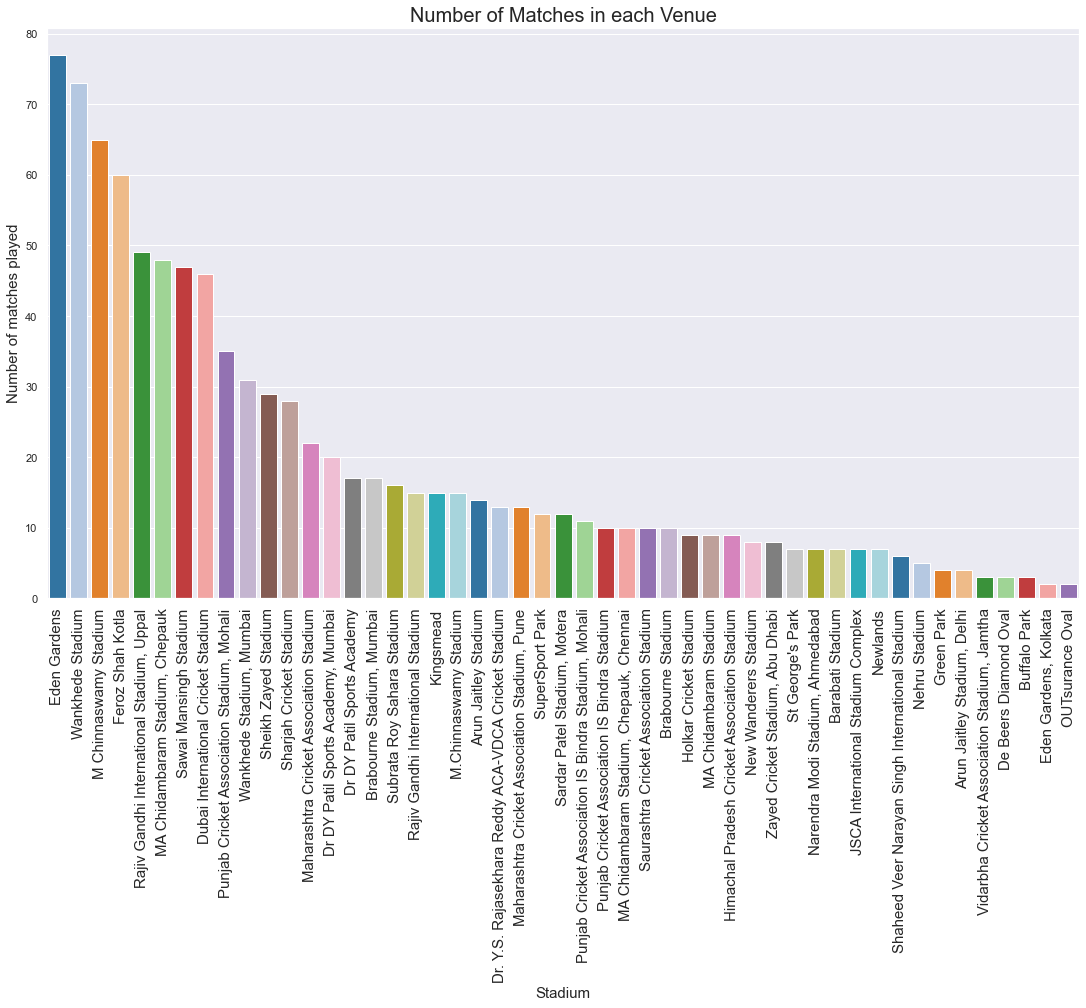

In [36]:
# Visualization of how many matches were played in which venue.
plt.subplots(figsize=(18.5,10.5))
sns.countplot(x = 'Venue', data = matches, palette = 'tab20', order=matches['Venue'].value_counts().index)
plt.ylabel('Number of matches played',fontsize=15)
plt.title('Number of Matches in each Venue',fontsize=20)
plt.xlabel('Stadium',fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.show()

* The maximum matches played on Eden Gardens Stadium
* Other favorite stadiums are Wankhede, M. Chinnaswamy Stadium.

**10. Observing the effect of the field situation on the winning for the 10 stadiums with the most matches**

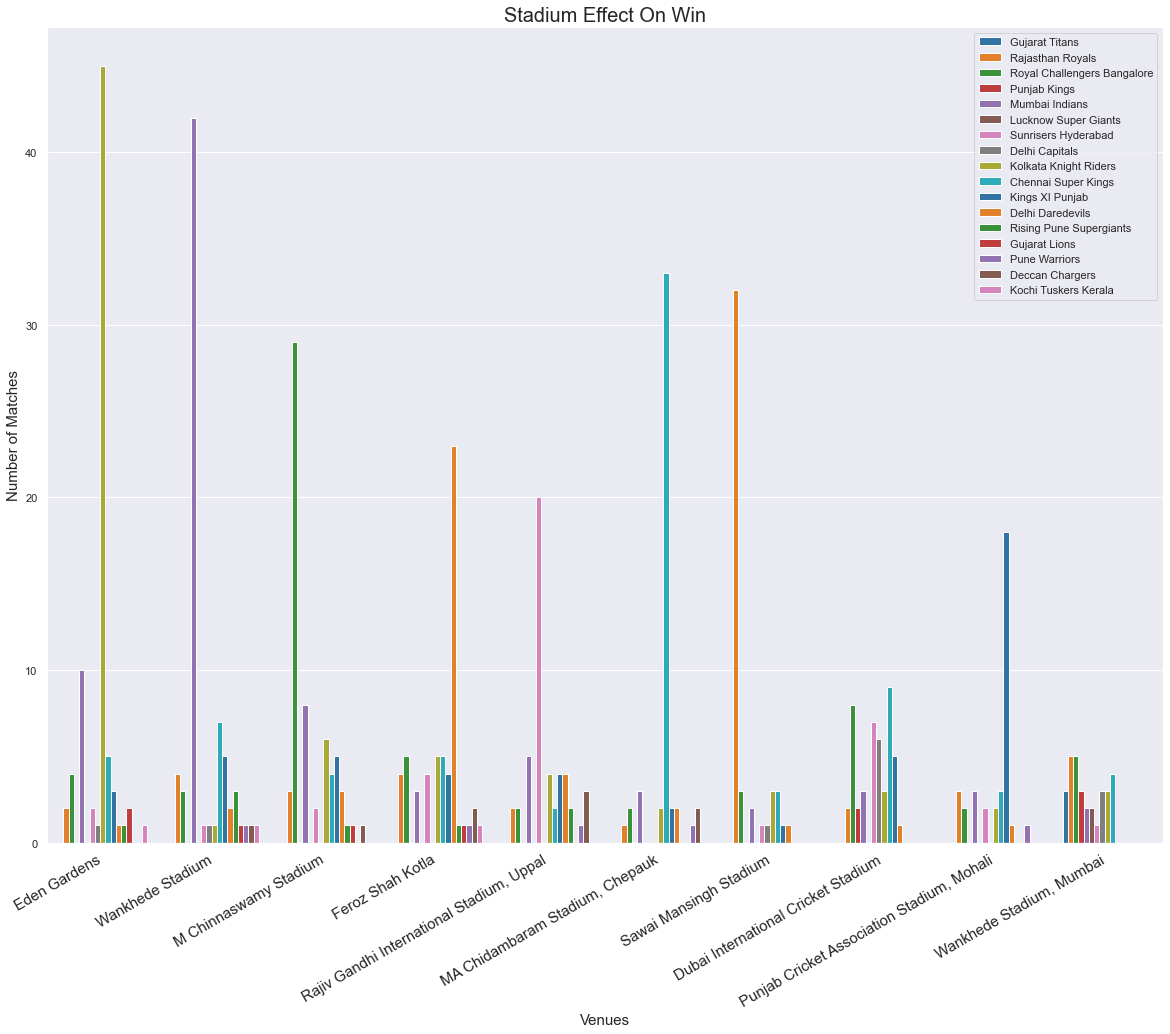

In [37]:
plt.figure(figsize = (20,15))
ax = sns.countplot(x='Venue', data = matches, hue = 'WinningTeam',order=matches['Venue'].value_counts().iloc[:10].index,palette='tab10')
plt.xticks(rotation=30, ha = 'right',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xlabel('Venues',fontsize=15)
plt.title('Stadium Effect On Win',fontsize=20)
plt.legend(loc='upper right')
plt.show()

* This shows that Mumbai Indians is not very good with the Eden Garden stadium, also due to the deplacement disadvantage.

**11. Observing the effect of the field situation on the winning for the 10 cities with the most matches**

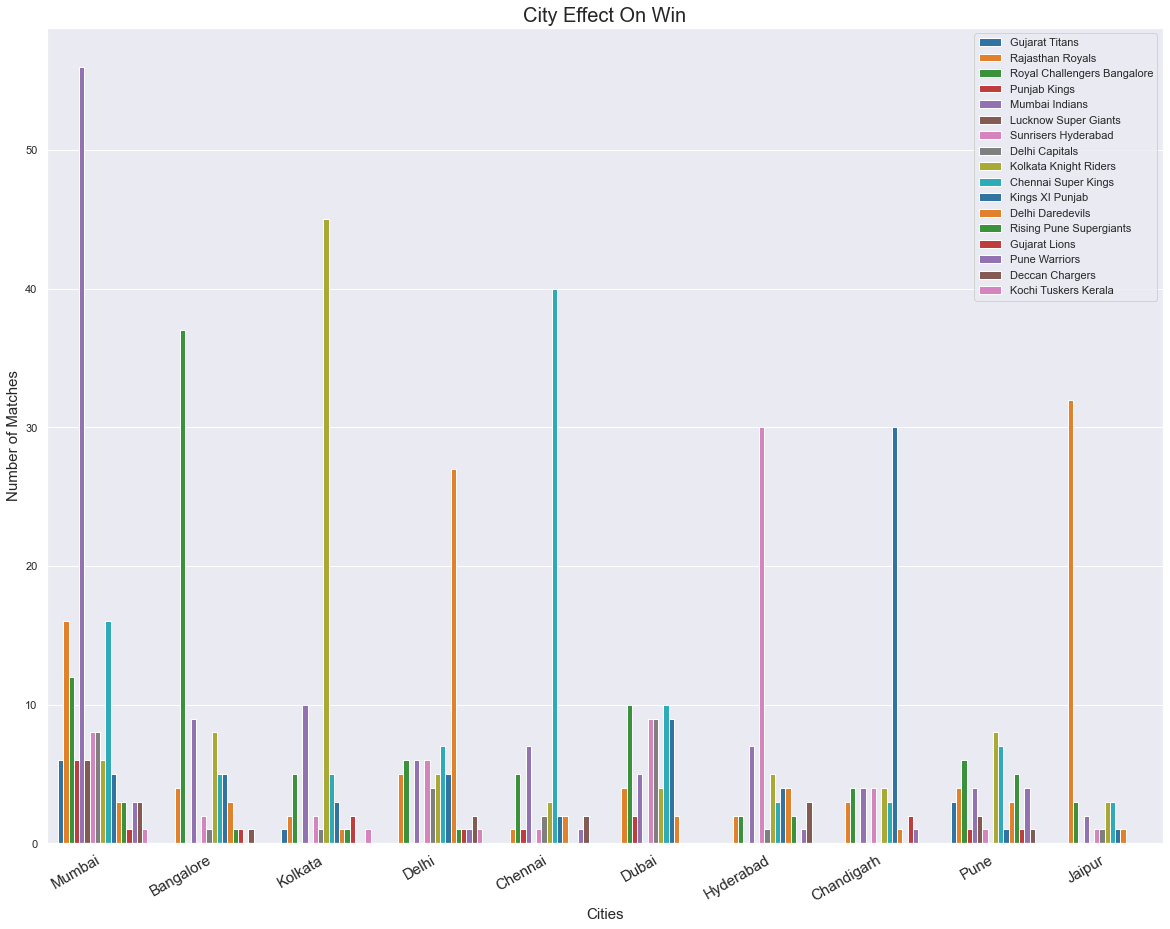

In [38]:
plt.figure(figsize = (20,15))
ax = sns.countplot(x='city', data = matches, hue = 'WinningTeam',order=matches['city'].value_counts().iloc[:10].index,palette='tab10')
plt.xticks(rotation=30, ha = 'right',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.xlabel('Cities',fontsize=15)
plt.title('City Effect On Win',fontsize=20)
plt.legend(loc='upper right')
plt.show()

* Mumbai, the city of the Mumbai Indians team, stands out as the city with the most wins.

**12. Plotting The Perfomance Of Team Against a Specific Opponent**

In [39]:
# Calculating the win-loss record for each team against specific opponents
team_performance = matches.groupby(['Team1', 'Team2', 'WinningTeam']).size().reset_index(name='Matches')
team_performance['Wins'] = team_performance.apply(lambda row: row['Matches'] if row['WinningTeam'] == row['Team1'] else 0, axis=1)
team_performance['Losses'] = team_performance.apply(lambda row: row['Matches'] if row['WinningTeam'] != row['Team1'] else 0, axis=1)

# Aggregating the win count for each team against an opponent
performance_matrix = team_performance.groupby(['Team1', 'Team2'])['Wins'].sum().unstack()

# Replace non-finite values with zeros
performance_matrix = performance_matrix.replace(np.nan, 0).replace(np.inf, 0)

# Converting the performance matrix to integers
performance_matrix = performance_matrix.astype(int)

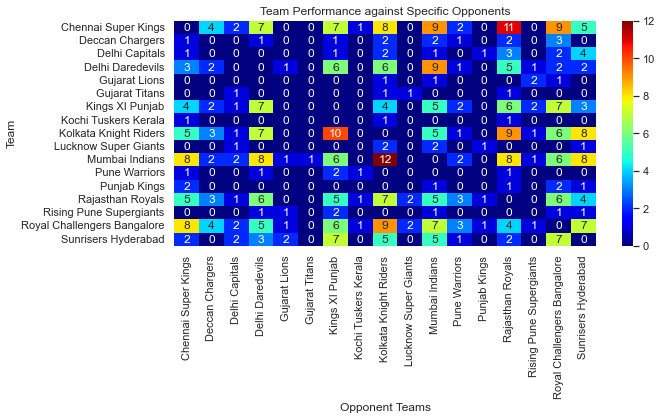

In [40]:
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_matrix, cmap='jet', annot=True, fmt='d')
plt.xlabel('Opponent Teams')
plt.ylabel('Team')
plt.title('Team Performance against Specific Opponents')
plt.tight_layout()
plt.show()

**13.Printing the win-loss ratio for each team**

In [41]:
team_wins = matches['WinningTeam'].value_counts()
team_matches = matches['Team1'].value_counts() + matches['Team2'].value_counts()
win_loss_ratio = team_wins / team_matches
num_teams = len(win_loss_ratio)
color_map = plt.get_cmap('tab20')
colors = color_map(np.linspace(0, 1, num_teams))

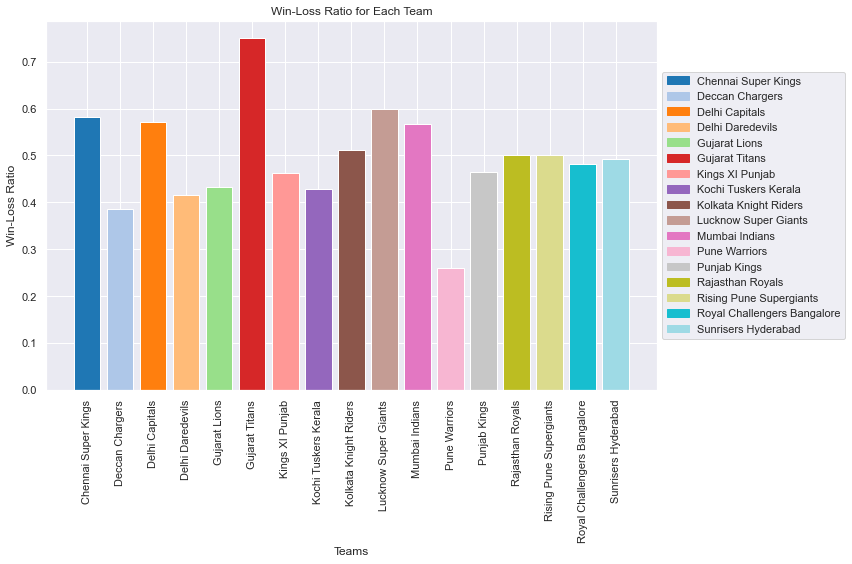

In [42]:
# plotting values
plt.figure(figsize=(12, 8))
bars = plt.bar(win_loss_ratio.index, win_loss_ratio.values, color=colors)
plt.xlabel('Teams')
plt.ylabel('Win-Loss Ratio')
plt.title('Win-Loss Ratio for Each Team')
legend_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(num_teams)]
plt.legend(legend_labels, win_loss_ratio.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# printing conclusion
conclusion_df = pd.DataFrame({'Team': win_loss_ratio.index, 'Win-Loss Ratio': win_loss_ratio.values})
conclusion_df = conclusion_df.sort_values(by='Win-Loss Ratio', ascending=False)
conclusion_df = conclusion_df.reset_index(drop=True)
conclusion_df

,Team,Win-Loss Ratio
0,Gujarat Titans,0.750000
1,Lucknow Super Giants,0.600000
2,Chennai Super Kings,0.581731
3,Delhi Capitals,0.571429
4,Mumbai Indians,0.567100
5,Kolkata Knight Riders,0.511211
6,Rajasthan Royals,0.500000
7,Rising Pune Supergiants,0.500000
8,Sunrisers Hyderabad,0.493421
9,Royal Challengers Bangalore,0.482301


**14.Plotting the toss decision for each team that is what is percentage of choosing batting and bowling for that team**

In [44]:
# Calculating the percentage of times each team chooses batting or bowling
team_toss_data = matches.groupby('TossWinner')['TossDecision'].value_counts(normalize=True).unstack() * 100

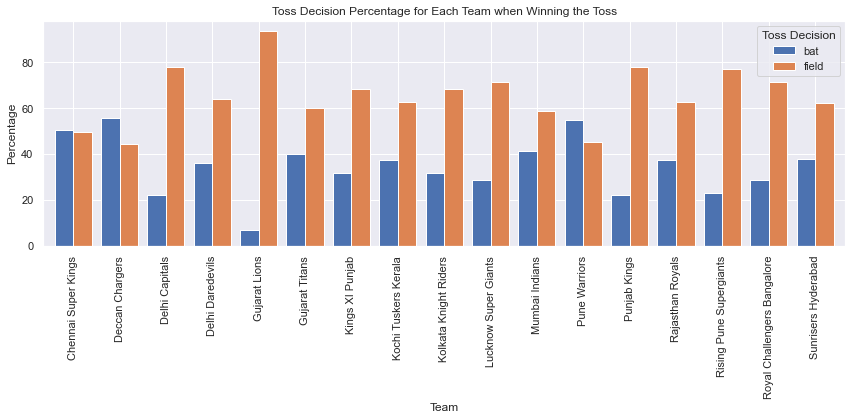

In [45]:
# Plotting the percentage for all teams
team_toss_data.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.title('Toss Decision Percentage for Each Team when Winning the Toss')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

In [46]:
# conclusion
team_toss_data = matches.groupby('TossWinner')['TossDecision'].value_counts(normalize=True).unstack() * 100
conclusion_df = pd.DataFrame(team_toss_data)
print("Conclusion:")
conclusion_df

Conclusion:


TossDecision,bat,field
TossWinner,,
Chennai Super Kings,50.458716,49.541284
Deccan Chargers,55.813953,44.186047
Delhi Capitals,22.222222,77.777778
Delhi Daredevils,36.250000,63.750000
Gujarat Lions,6.666667,93.333333
Gujarat Titans,40.000000,60.000000
Kings XI Punjab,31.764706,68.235294
Kochi Tuskers Kerala,37.500000,62.500000
Kolkata Knight Riders,31.578947,68.421053


**15.Win-loss percentage depending on toss decision**

**Toss win and choose to Bat**

In [47]:
# Filtering the DataFrame for matches where the toss decision is batting
batting_df = matches[matches['TossDecision'] == 'bat']
# Grouping the DataFrame by TossWinner and calculate the total number of matches won and lost for each team
team_stats = batting_df.groupby('TossWinner')['WinningTeam'].value_counts().unstack(fill_value=0)
# Excluding 'Kochi Tuskers Kerala' from the DataFrame
if 'Kochi Tuskers Kerala' in team_stats.index:
    team_stats = team_stats.drop('Kochi Tuskers Kerala')
# Calculating win and loss percentages
team_stats['WinPercentage'] = team_stats.apply(lambda row: (row[row.name] / row.sum()) * 100, axis=1)
team_stats['LossPercentage'] = 100 - team_stats['WinPercentage']

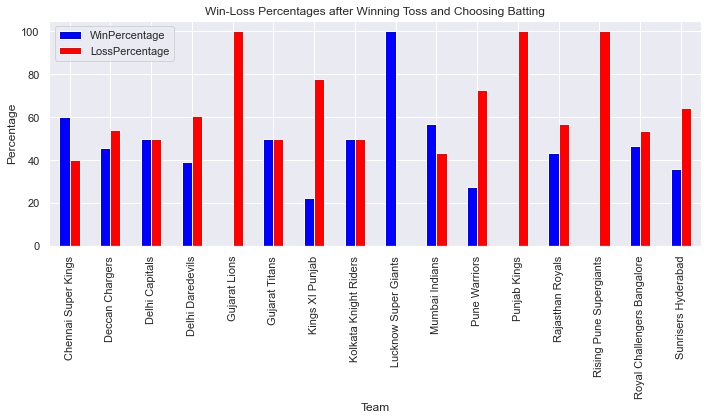

In [48]:
# Ploting the graph
fig, ax = plt.subplots(figsize=(10, 6))

team_stats[['WinPercentage', 'LossPercentage']].plot(kind='bar', ax=ax, color=['blue', 'red'])
ax.set_xlabel('Team')
ax.set_ylabel('Percentage')
ax.set_title('Win-Loss Percentages after Winning Toss and Choosing Batting')

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
team_stats[['WinPercentage', 'LossPercentage']]

WinningTeam,WinPercentage,LossPercentage
TossWinner,,
Chennai Super Kings,60.000000,40.000000
Deccan Chargers,45.833333,54.166667
Delhi Capitals,50.000000,50.000000
Delhi Daredevils,39.285714,60.714286
Gujarat Lions,0.000000,100.000000
Gujarat Titans,50.000000,50.000000
Kings XI Punjab,22.222222,77.777778
Kolkata Knight Riders,50.000000,50.000000
Lucknow Super Giants,100.000000,0.000000


**Toss win and choose to Field**

In [50]:
# Filtering the DataFrame for matches where the toss decision is fielding
fielding_df = matches[matches['TossDecision'] == 'field']

# Grouping the DataFrame by TossWinner and calculate the total number of matches won and lost for each team
team_stats = fielding_df.groupby('TossWinner')['WinningTeam'].value_counts().unstack(fill_value=0)

# Excluding 'Kochi Tuskers Kerala' from the DataFrame
if 'Kochi Tuskers Kerala' in team_stats.index:
    team_stats = team_stats.drop('Kochi Tuskers Kerala')
    
# Calculating win and loss percentages
team_stats['WinPercentage'] = team_stats.apply(lambda row: (row[row.name] / row.sum()) * 100, axis=1)
team_stats['LossPercentage'] = 100 - team_stats['WinPercentage']

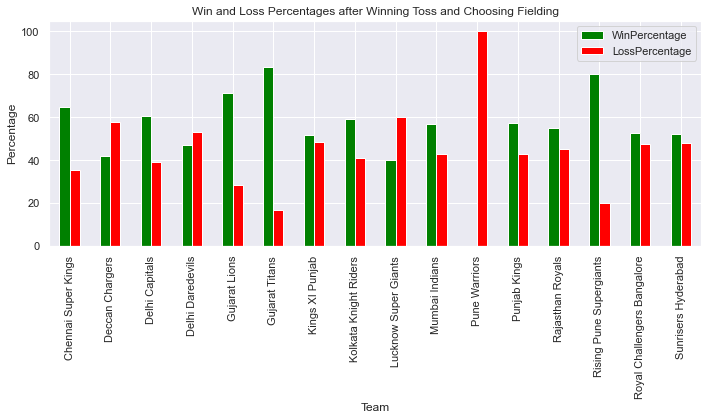

In [51]:
# Ploting the graph
fig, ax = plt.subplots(figsize=(10, 6))

team_stats[['WinPercentage', 'LossPercentage']].plot(kind='bar', ax=ax, color=['green', 'red'])
ax.set_xlabel('Team')
ax.set_ylabel('Percentage')
ax.set_title('Win and Loss Percentages after Winning Toss and Choosing Fielding')

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

**16.Performance of the team over the year**

In [52]:
# Grouping the DataFrame by team and season, and count the number of matches played
team_performance = matches.groupby(['Team1', 'Season']).size().reset_index(name='MatchesPlayed')

In [53]:
# Pivot the DataFrame to convert seasons into columns
team_performance_pivot = team_performance.pivot(index='Season', columns='Team1', values='MatchesPlayed')

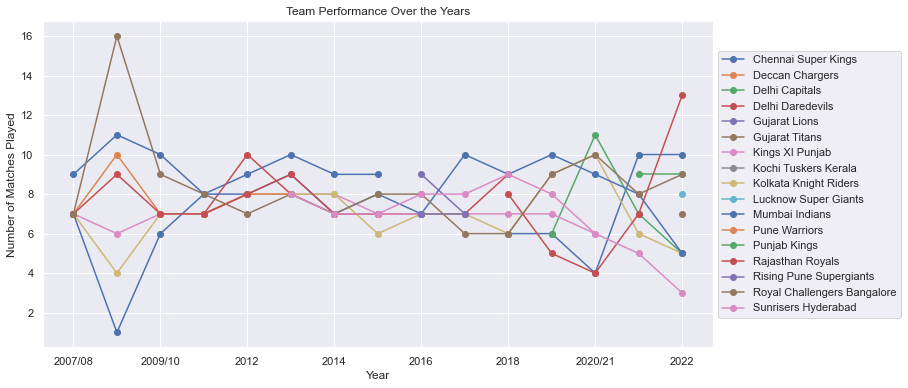

In [54]:
# Plotting the line chart
team_performance_pivot.plot.line(marker='o',figsize=(12, 6))
plt.title('Team Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches Played')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**17.Plotting the win percentage of each team in a Particular stadium**

In [55]:
# Grouping the data by venue and winning team and count the occurrences
venue_winning_counts = matches.groupby(['Venue', 'WinningTeam']).size().reset_index(name='Count')

# Calculating the total matches played in each venue
venue_total_matches = venue_winning_counts.groupby('Venue')['Count'].sum().reset_index(name='TotalMatches')

# Merging the winning counts and total matches dataframes
venue_stats = pd.merge(venue_winning_counts, venue_total_matches, on='Venue')

# Calculating the winning percentage
venue_stats['WinningPercentage'] = (venue_stats['Count'] / venue_stats['TotalMatches']) * 100

# Finding the team with the maximum winning percentage in each venue
max_winning_teams = venue_stats.groupby('Venue')['WinningPercentage'].idxmax()
best_teams_in_venues = venue_stats.loc[max_winning_teams]

# Extracting only the Stadium_Name from the Venue column
best_teams_in_venues['Stadium_Name'] = best_teams_in_venues['Venue'].apply(lambda x: x.split(',')[0])

# Assigning a different color to each team
team_colors = plt.cm.tab20.colors[:len(best_teams_in_venues)]

In [56]:
# Printing the conclusion
conclusion_df = best_teams_in_venues[['Stadium_Name', 'WinningTeam', 'WinningPercentage']].copy()
conclusion_df.columns = ['Stadium', 'Best Performing Team', 'Winning Percentage']
conclusion_df.reset_index(drop=True, inplace=True)
conclusion_df

,Stadium,Best Performing Team,Winning Percentage
0,Arun Jaitley Stadium,Delhi Capitals,28.571429
1,Arun Jaitley Stadium,Mumbai Indians,50.000000
2,Barabati Stadium,Deccan Chargers,42.857143
3,Brabourne Stadium,Mumbai Indians,50.000000
4,Brabourne Stadium,Delhi Capitals,23.529412
5,Buffalo Park,Chennai Super Kings,33.333333
6,De Beers Diamond Oval,Chennai Super Kings,33.333333
7,Dr DY Patil Sports Academy,Mumbai Indians,29.411765
8,Dr DY Patil Sports Academy,Chennai Super Kings,15.000000
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,23.076923


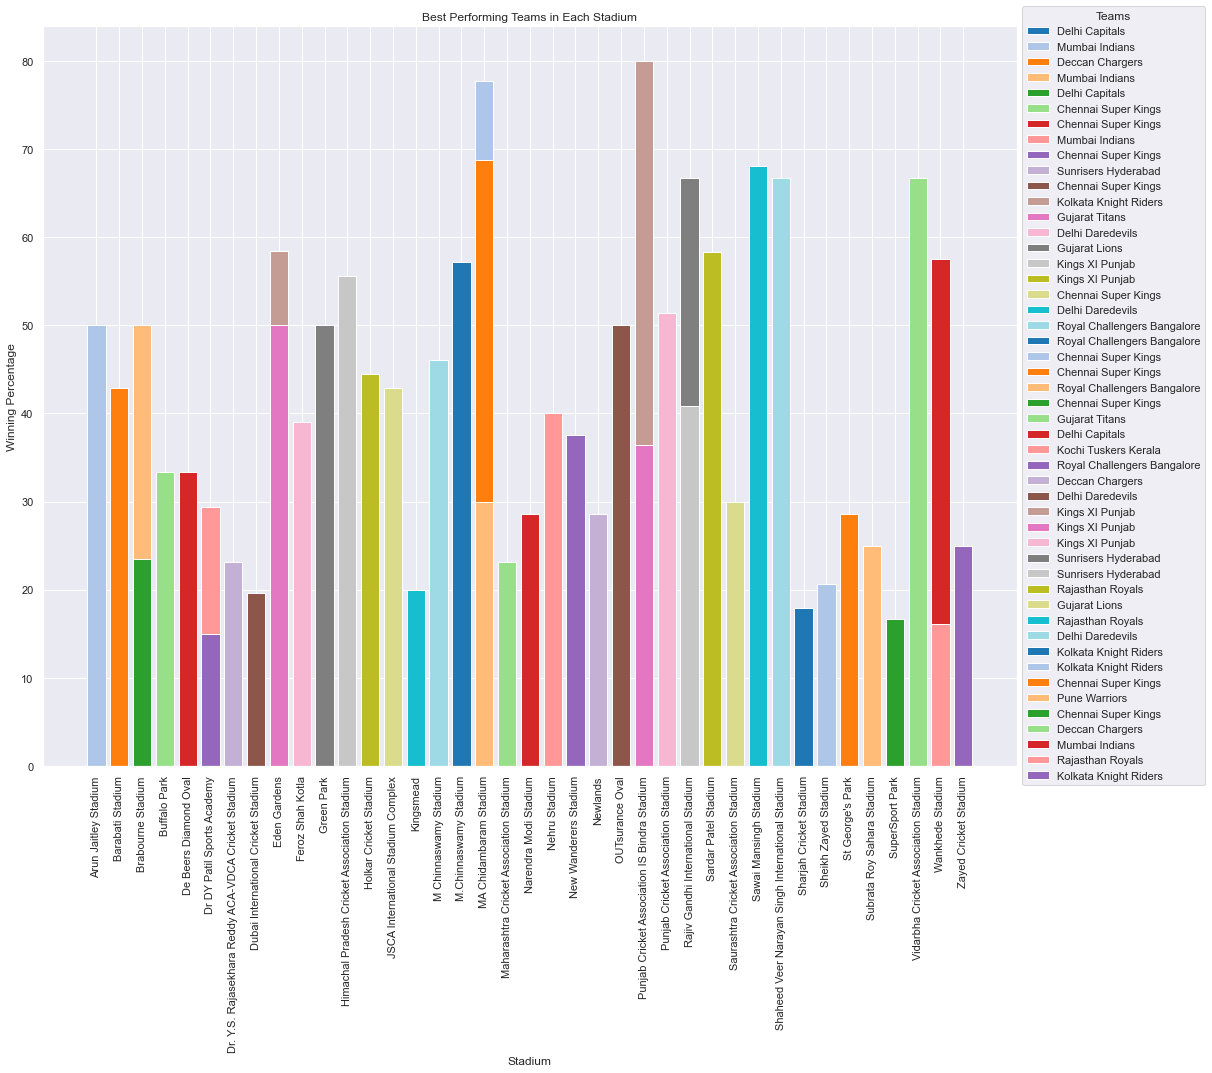

In [57]:
# Plotting the data
fig, ax = plt.subplots(figsize=(20, 15))
bars = ax.bar(best_teams_in_venues['Stadium_Name'], best_teams_in_venues['WinningPercentage'], color=team_colors)
team_names = best_teams_in_venues['WinningTeam'].tolist()
legend = ax.legend(bars, team_names, title='Teams', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Best Performing Teams in Each Stadium')
plt.xlabel('Stadium')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

**Match Winner Prediction**

* Merge 2 Dataset

In [58]:
df = pd.merge(matches, deliveries, left_on='ID', right_on='ID')

In [59]:
df.head()

,ID,city,date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,5/29/2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,5/29/2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,5/29/2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,5/29/2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,5/29/2022,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


**18. Total runs across each season**

In [60]:
# Getting total runs from each season
total_run = df.groupby(['Season','ID'])['total_run'].sum().reset_index()
total_run = total_run.groupby(['Season'])['total_run'].sum().reset_index()
total_run

,Season,total_run
0,2007/08,17937
1,2009,16353
2,2009/10,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


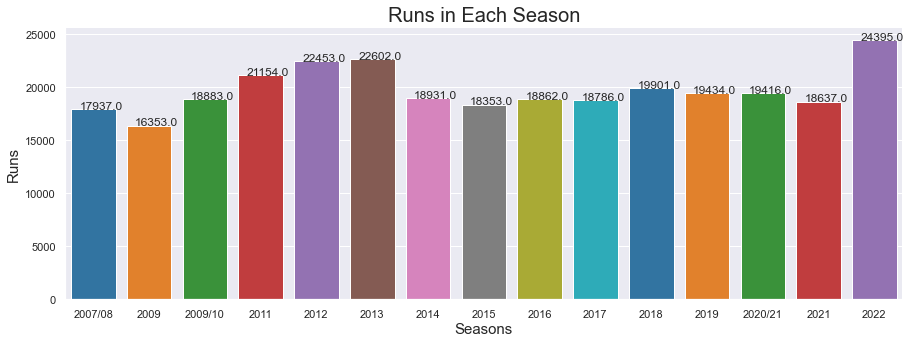

In [61]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='Season', y='total_run',data = total_run, palette = 'tab10')
plt.xlabel('Seasons',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs in Each Season',fontsize=20)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))   


plt.show()

* In 2011,2012,2013,2022 more then 20000 runs were made.
* In each Season there were more then 15000 runs.
* Many runs in each season of IPL show that the matches are very competitive.

**19. Total Runs score by each Team**

In [62]:
# Getting total runs from each teams
team_runs = df.groupby('BattingTeam')['total_run'].sum().reset_index()
team_runs = team_runs.groupby(['BattingTeam'])['total_run'].sum().reset_index()

In [63]:
team_runs

,BattingTeam,total_run
0,Chennai Super Kings,33393
1,Deccan Chargers,11463
2,Delhi Capitals,10145
3,Delhi Daredevils,24296
4,Gujarat Lions,4862
5,Gujarat Titans,2663
6,Kings XI Punjab,30064
7,Kochi Tuskers Kerala,1901
8,Kolkata Knight Riders,34201
9,Lucknow Super Giants,2548


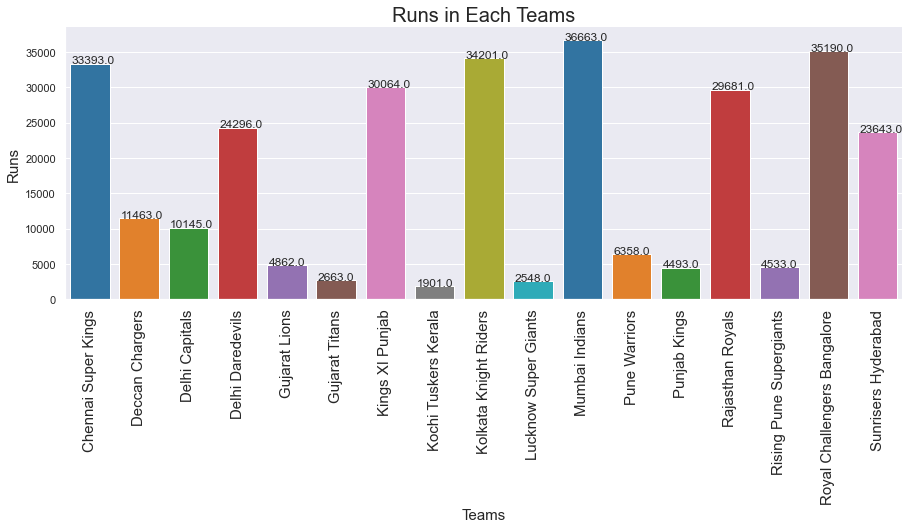

In [64]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='BattingTeam', y='total_run',data = team_runs, palette = 'tab10')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs in Each Teams',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.5))   

plt.show()

* Mumbai Indians is the team with the most total runs.

**20. Visualization of teams' runs according to 1st and 2nd Inning**

In [65]:
# Runs Distribution By each Team in 1st Inning and 2nd Inning
inning_run = df.groupby(['BattingTeam','ID','innings', 'overs'])['total_run'].sum().reset_index()
inning_run = inning_run.groupby(['BattingTeam','innings'])['total_run'].sum().reset_index()
inning_run = inning_run.drop(inning_run[inning_run.innings > 2 ].index)
inning_run[0:]

,BattingTeam,innings,total_run
0,Chennai Super Kings,1,18826
1,Chennai Super Kings,2,14558
3,Deccan Chargers,1,6765
4,Deccan Chargers,2,4698
5,Delhi Capitals,1,4807
6,Delhi Capitals,2,5317
9,Delhi Daredevils,1,11247
10,Delhi Daredevils,2,13038
12,Gujarat Lions,1,2267
13,Gujarat Lions,2,2589


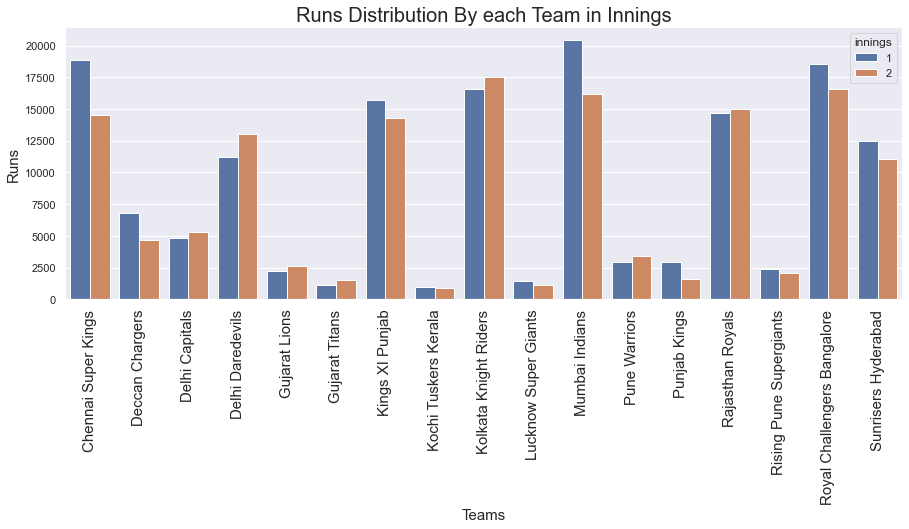

In [66]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='BattingTeam', y='total_run',data = inning_run,hue='innings')
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Runs Distribution By each Team in Innings',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

* Among the teams with high wins, all except Kolkata Knight Riders are observed to have higher running in the 1st inning than the 2nd inning.
* For example, for teams with high wins such as Mumbai Indians, Chenai Super Kings, Royal Challengers Bangalore, the run in 1st Inning is higher.

**21. Top 10 Batsman with most number of Fours**

In [67]:
batsman = df['batter'].unique()
batsman[:5]

array(['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal',
       'SO Hetmyer'], dtype=object)

In [68]:
def check_fours(x): # Counting number of fours
    global count
    if x==4:
        count+=1

In [69]:
count=0
batsman_fours = []       # This list will contain the fours amount numbers of each batsman hitting.
for i in batsman:
    temp_df = df[df['batter']==i]
    temp_df['batsman_run'].apply(check_fours)
    batsman_fours.append(count)
    count=0

In [70]:
df_fours = pd.DataFrame(data={'batter':batsman, 'Fours':batsman_fours})
df_fours.sort_values('Fours', inplace=True,ascending=False,)
df_fours.reset_index(drop=True, inplace=True)
df_fours = df_fours[:10]

df_fours

,batter,Fours
0,S Dhawan,701
1,V Kohli,581
2,DA Warner,577
3,RG Sharma,519
4,SK Raina,506
5,G Gambhir,492
6,RV Uthappa,481
7,AM Rahane,431
8,KD Karthik,426
9,AB de Villiers,414


In [71]:
# Ranking of players by fours amount.
df_fours.T

,0,1,2,3,4,5,6,7,8,9
batter,S Dhawan,V Kohli,DA Warner,RG Sharma,SK Raina,G Gambhir,RV Uthappa,AM Rahane,KD Karthik,AB de Villiers
Fours,701,581,577,519,506,492,481,431,426,414


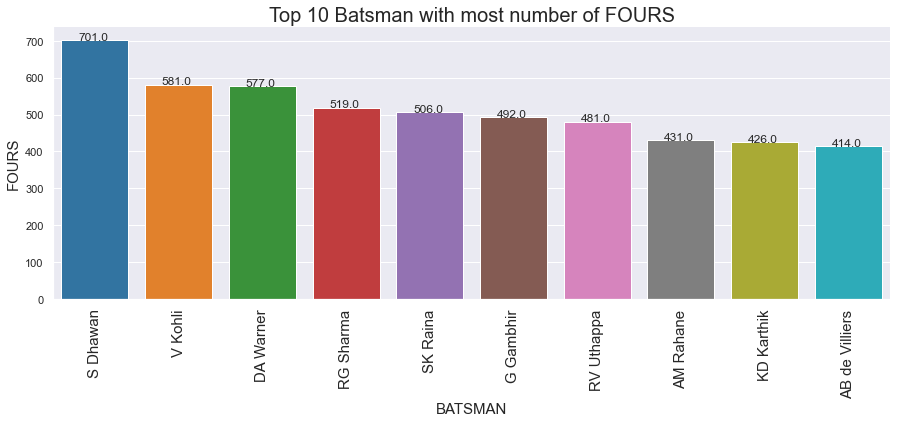

In [72]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='batter', y='Fours',data = df_fours, palette = 'tab10')
plt.xlabel('BATSMAN',fontsize=15)
plt.ylabel('FOURS',fontsize=15)
plt.title('Top 10 Batsman with most number of FOURS',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))   

plt.show()

* S Dhawan came in first with 701 fours, followed by V Kohli.
* RG Sharma is in 4th place with 519 fours.

**22. Top 10 Batsman with most number of Sixes**

In [73]:
def check_sixes(x): # Counting number sixes
    global count
    if x==6:
        count+=1

In [74]:
count=0
batsman_sixes = []       # This list will contain the sixes amount numbers of each batsman hitting.
for i in batsman:
    temp_df = df[df['batter']==i]
    temp_df['batsman_run'].apply(check_sixes)
    batsman_sixes.append(count)
    count=0

In [75]:
df_sixes = pd.DataFrame(data={'batter':batsman, 'Sixes':batsman_sixes})
df_sixes.sort_values('Sixes', inplace=True,ascending=False,)
df_sixes.reset_index(drop=True, inplace=True)
df_sixes = df_sixes[:10]

df_sixes

,batter,Sixes
0,CH Gayle,359
1,AB de Villiers,253
2,RG Sharma,241
3,MS Dhoni,229
4,KA Pollard,224
5,V Kohli,219
6,DA Warner,216
7,SK Raina,204
8,SR Watson,190
9,RV Uthappa,182


In [76]:
# Ranking of players by sixes amount.
df_sixes.T

,0,1,2,3,4,5,6,7,8,9
batter,CH Gayle,AB de Villiers,RG Sharma,MS Dhoni,KA Pollard,V Kohli,DA Warner,SK Raina,SR Watson,RV Uthappa
Sixes,359,253,241,229,224,219,216,204,190,182


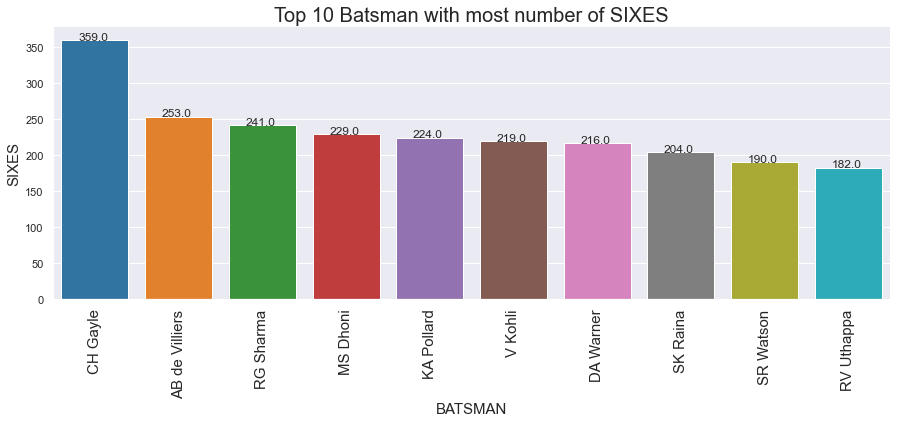

In [77]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='batter', y='Sixes',data = df_sixes, palette = 'tab10')
plt.xlabel('BATSMAN',fontsize=15)
plt.ylabel('SIXES',fontsize=15)
plt.title('Top 10 Batsman with most number of SIXES',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))   

plt.show()

* CH Gayle tops the list as expected.
* Although AB de Villiers is not in the fours, it is in the 2nd place in the sixes.
* RG Sharma is in the 3rd place in the sixes.

**23. Top 10 Batsman with most number of dot balls.**

In [78]:
def check_dots(x): # Counting number of dots
    global count
    if x==0:
        count+=1

In [79]:
count=0
batsman_dots = []      
for i in batsman:
    temp_df = df[df['batter']==i]
    temp_df['batsman_run'].apply(check_dots)
    batsman_dots.append(count)
    count=0

In [80]:
df_dots = pd.DataFrame(data={'batter':batsman, 'Dots':batsman_dots})
df_dots.sort_values('Dots', inplace=True,ascending=False,)
df_dots.reset_index(drop=True, inplace=True)
df_dots = df_dots[:10]

df_dots

,batter,Dots
0,S Dhawan,1960
1,V Kohli,1886
2,RG Sharma,1779
3,CH Gayle,1636
4,DA Warner,1636
5,RV Uthappa,1598
6,SK Raina,1476
7,MS Dhoni,1370
8,G Gambhir,1357
9,AM Rahane,1341


In [81]:
df_dots.T

,0,1,2,3,4,5,6,7,8,9
batter,S Dhawan,V Kohli,RG Sharma,CH Gayle,DA Warner,RV Uthappa,SK Raina,MS Dhoni,G Gambhir,AM Rahane
Dots,1960,1886,1779,1636,1636,1598,1476,1370,1357,1341


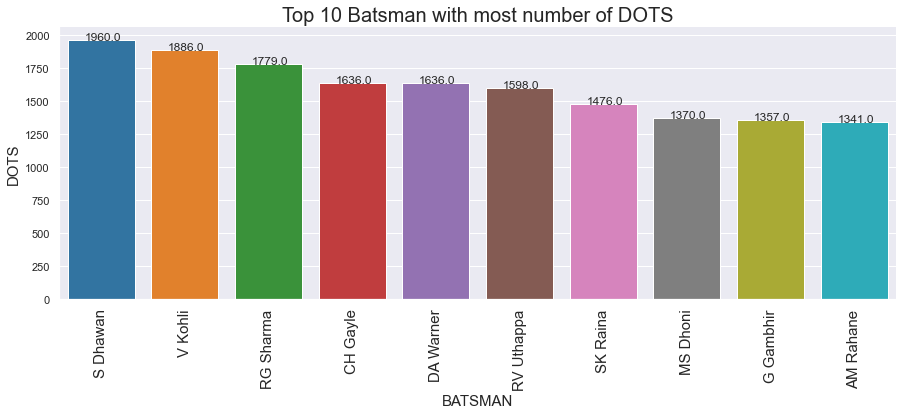

In [82]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x ='batter', y='Dots',data = df_dots, palette = 'tab10')
plt.xlabel('BATSMAN',fontsize=15)
plt.ylabel('DOTS',fontsize=15)
plt.title('Top 10 Batsman with most number of DOTS',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

# Write the value count
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.5))   

plt.show()

* V Kohli tops the list, followed by S Dhawan and CH Gayle.

**24. Top 10 Individuals Score**

In [83]:
individual  = df.groupby(['batter','ID'])['batsman_run'].sum().reset_index()
individual.sort_values('batsman_run',axis=0, inplace=True,ascending=False)
individual.drop('ID',inplace=True,axis=1)
individual = individual[:20]

In [84]:
individual

,batter,batsman_run
2104,CH Gayle,175
1693,BB McCullum,158
9132,Q de Kock,140
360,AB de Villiers,133
5990,KL Rahul,132
375,AB de Villiers,129
2096,CH Gayle,128
10243,RR Pant,128
6697,M Vijay,127
2673,DA Warner,126


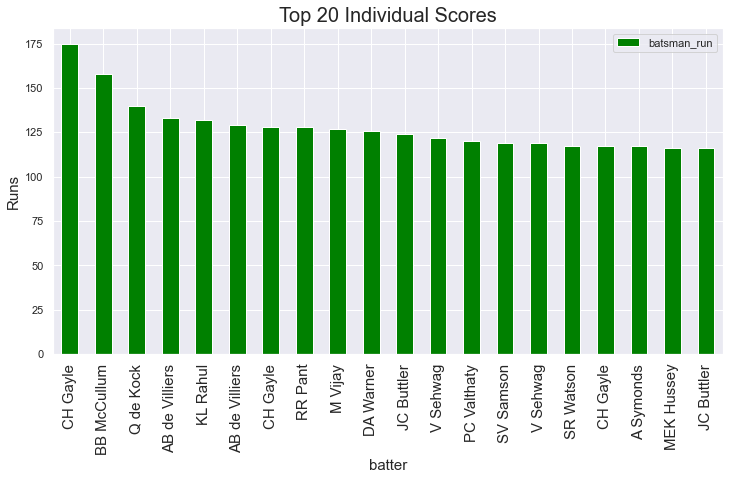

In [85]:
individual.plot(x='batter', kind='bar', figsize=(12,6),color='green')
plt.xlabel('batter',fontsize=15)
plt.ylabel('Runs',fontsize=15)
plt.title('Top 20 Individual Scores',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

* The day CH Gayle hit 175 runs

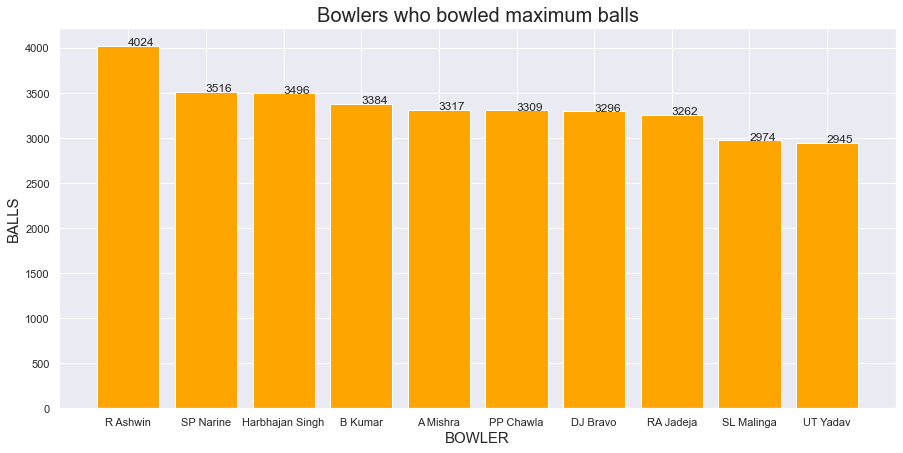

In [86]:
bowler = df['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=bowler.index, height=bowler.values,color='orange')

plt.title('Bowlers who bowled maximum balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(bowler.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 

* R Ashwin bowled maximum balls.

**25. Top 10 Bowlers with maximum number of Dot Balls**

In [87]:
dot_ball = df[df['total_run']==0]
dot_ball = dot_ball['bowler'].value_counts()[:10]
dot_ball

B Kumar            1385
R Ashwin           1377
SP Narine          1363
Harbhajan Singh    1263
A Mishra           1150
SL Malinga         1144
PP Chawla          1140
UT Yadav           1090
JJ Bumrah          1084
P Kumar            1075
Name: bowler, dtype: int64

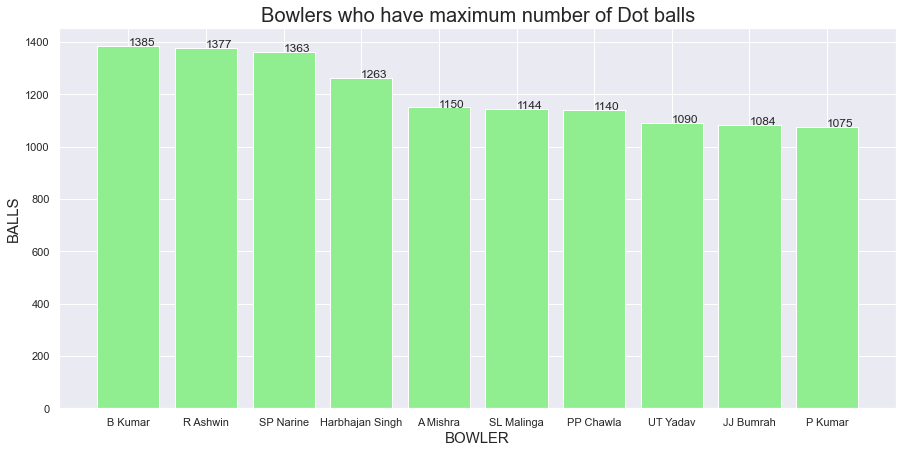

In [88]:
plt.figure(figsize=(15,7))
plt.bar(x=dot_ball.index, height=dot_ball.values,color='lightgreen')

plt.title('Bowlers who have maximum number of Dot balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(dot_ball.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 

* B Kumar bowled maximum Dot balls.

**26. Top 10 Bowlers with maximum number of extras**

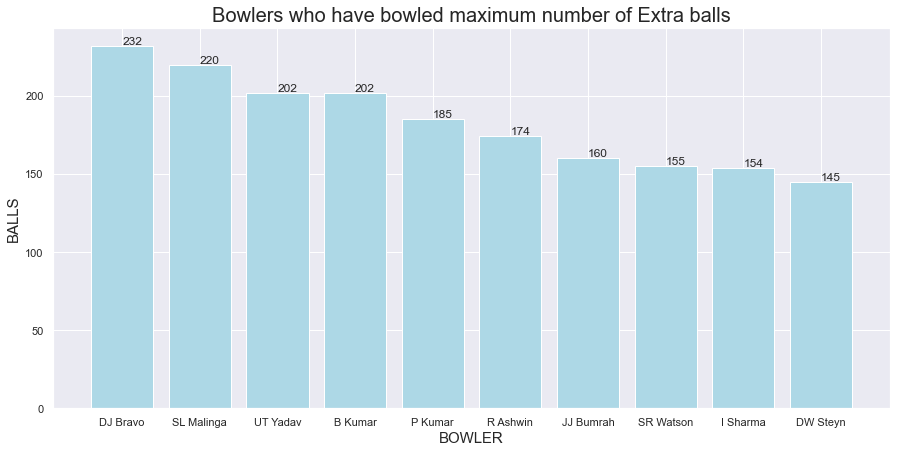

In [89]:
extra_runs = df[df['extras_run']!=0]
extra_runs = extra_runs['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=extra_runs.index, height=extra_runs.values,color='lightblue')

plt.title('Bowlers who have bowled maximum number of Extra balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(extra_runs.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show() 

* DJ Bravo bowled maximum Extra balls.

# SENTIMENTAL ANALYSIS

In [90]:
df = pd.read_csv(r"E:\AIF Document\IPL_2022_tweets.csv",low_memory=False)
    
sid = SentimentIntensityAnalyzer()

review = df['text']
review = str(review).encode('utf-8')

df['scores'] = df['text'].apply(lambda review:sid.polarity_scores(str(review)))

In [91]:
df = pd.read_csv(r"E:\AIF Document\IPL_2022_tweets.csv",low_memory=False)

In [92]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457,6,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502,2675,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63,699,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
574659,Rohit Sharma FC,NaN,Hii This is an Die Heart Fan Club of Rohit Sharma,2021-08-02 04:05:06,3.0,11.0,219.0,False,2022-01-06 13:05:44,2⃣5⃣ Matches 🏏\n1⃣4⃣2⃣0⃣ Runs 🔥\n2⃣ Centuries ...,"['Mumbaiindians', 'OneFamily', 'CricketMeriJaa...",Twitter for Android,False
574660,Sanket Pandey,India,Proud to be an indian\n-Jay hind.\n-Vande matr...,2017-01-11 13:44:24,14.0,333.0,3844.0,False,2022-01-06 13:04:34,Tough competition 💪😂\n\n.\n#IPL #BCCI #IPL2022...,"['IPL', 'BCCI', 'IPL2022', 'twitter']",Twitter Web App,False
574661,InsideSport,"New Delhi, India",Official website of InsideSport - India's prem...,2017-01-21 11:03:22,5654.0,759.0,7723.0,False,2022-01-06 12:59:46,Lucknow IPL franchise ropes in MyCircle11 as t...,"['IPL2022', 'LucknowIPLTeam', 'IPL']",Twitter Web App,False
574662,Deepanshu Speaks,India,Offical Twitter handle of YouTube channel #Dee...,2021-06-17 14:44:22,11.0,42.0,1479.0,False,2022-01-06 12:52:12,Official conformation : RPSG's Lucknow IPL Tea...,"['TeamLucknow', 'IPL2022']",Twitter for Android,False


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574664 entries, 0 to 574663
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         574664 non-null  object 
 1   user_location     384107 non-null  object 
 2   user_description  492538 non-null  object 
 3   user_created      574655 non-null  object 
 4   user_followers    574649 non-null  float64
 5   user_friends      574649 non-null  object 
 6   user_favourites   574649 non-null  object 
 7   user_verified     574649 non-null  object 
 8   date              574649 non-null  object 
 9   text              574649 non-null  object 
 10  hashtags          574620 non-null  object 
 11  source            574640 non-null  object 
 12  is_retweet        574640 non-null  object 
dtypes: float64(1), object(12)
memory usage: 57.0+ MB


In [94]:
df.shape

(574664, 13)

In [95]:
df.isnull().sum()

user_name                0
user_location       190557
user_description     82126
user_created             9
user_followers          15
user_friends            15
user_favourites         15
user_verified           15
date                    15
text                    15
hashtags                44
source                  24
is_retweet              24
dtype: int64

# DATA CLEANING

In [96]:
# Removing Null value
df.dropna(inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348220 entries, 0 to 574663
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         348220 non-null  object 
 1   user_location     348220 non-null  object 
 2   user_description  348220 non-null  object 
 3   user_created      348220 non-null  object 
 4   user_followers    348220 non-null  float64
 5   user_friends      348220 non-null  object 
 6   user_favourites   348220 non-null  object 
 7   user_verified     348220 non-null  object 
 8   date              348220 non-null  object 
 9   text              348220 non-null  object 
 10  hashtags          348220 non-null  object 
 11  source            348220 non-null  object 
 12  is_retweet        348220 non-null  object 
dtypes: float64(1), object(12)
memory usage: 37.2+ MB


In [98]:
df.shape

(348220, 13)

In [99]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

# Data Visualization

**1.Finding the distribution of tweets by userlocation**

In [100]:
# Removing ",India" from user_location column
df['user_location'] = df['user_location'].str.replace(', India', '')

# Counting the number of tweets from each modified user location
location_counts = df['user_location'].value_counts().head(10)  # Adjusting the number (e.g., head(10)) based on your preference

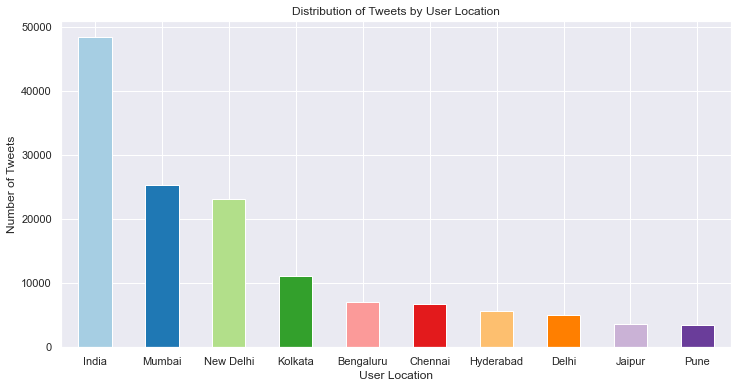

In [101]:
# Set a dark color palette
colors = sns.color_palette('Paired')

# Plotting the graph
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color=colors, align='center')
plt.title('Distribution of Tweets by User Location')
plt.xlabel('User Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [102]:
# Getting the most common user location
most_common_location = location_counts.index[0]

# Calculating the total number of tweets
total_tweets = df.shape[0]

# Calculating the percentage of tweets from the most common location
percentage_most_common = (location_counts[0] / total_tweets) * 100

# Generating the conclusion
conclusion = f"The most common user location for tweeting is {most_common_location}, accounting for {percentage_most_common:.2f}% of the total tweets."

# Printing the conclusion
print(conclusion)

The most common user location for tweeting is India, accounting for 13.91% of the total tweets.


**2.Nature Of Tweets**

In [103]:
# Performing sentiment analysis on each tweet
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorizing sentiments
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculating the percentage of positive, negative, and neutral tweets
sentiment_counts = df['sentiment_category'].value_counts(normalize=True) * 100

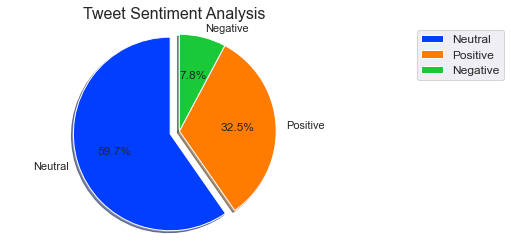

In [104]:
colors = sns.color_palette('bright', len(sentiment_counts))

# Creating a pie chart with 90-degree start angle and custom color palette
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=(0.1, 0, 0), colors=colors)

# Adding a title and legend
plt.title('Tweet Sentiment Analysis', fontsize=16)
plt.legend(sentiment_counts.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

# Making the plot a perfect circle
plt.axis('equal')

# Increasing font size of labels and percentages
plt.setp(plt.gca().get_xticklabels(), fontsize=12)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.setp(plt.gca().get_legend().get_texts(), fontsize=12)

# Show the plot
plt.show()

In [105]:
# Print the sentiment analysis results
print("Sentiment Analysis Results:")
print("----------------------------")
print(f"Positive Tweets: {sentiment_counts['Positive']:.2f}%")
print(f"Negative Tweets: {sentiment_counts['Negative']:.2f}%")
print(f"Neutral Tweets: {sentiment_counts['Neutral']:.2f}%")

Sentiment Analysis Results:
----------------------------
Positive Tweets: 32.54%
Negative Tweets: 7.78%
Neutral Tweets: 59.68%


**3.FINDING OUT THE MOST USED HASHTAGS FOR IPL2022**

**Most used Hashtags for IPL2022**

In [106]:
# Spliting hashtags into individual tags
df['hashtags'] = df['hashtags'].str.lower().str.split()

# Flatting the list of hashtags
all_hashtags = [tag for tags in df['hashtags'] for tag in tags]

# Creating a frequency count of hashtags
hashtag_counts = pd.Series(all_hashtags).value_counts().head(10)

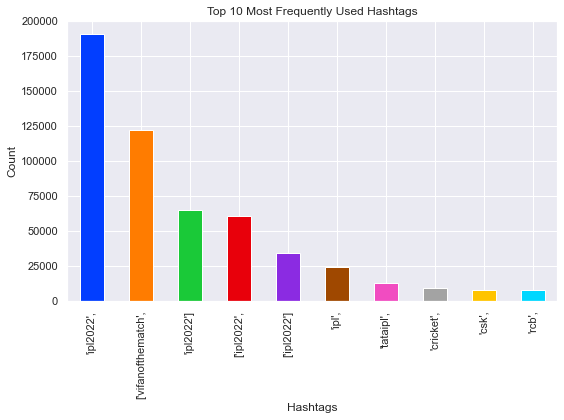

In [107]:
# Plotting the graph
plt.figure(figsize=(8, 6))
colors = sns.color_palette('bright')
hashtag_counts.plot(kind='bar', color=colors)
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Most Frequently Used Hashtags')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [108]:
# Finding out the conclusion
conclusion_df = pd.DataFrame({'Hashtags': hashtag_counts.index, 'Count': hashtag_counts.values})
conclusion_df

,Hashtags,Count
0,"'ipl2022',",190575
1,"['vifanofthematch',",122172
2,'ipl2022'],64603
3,"['ipl2022',",60660
4,['ipl2022'],34101
5,"'ipl',",23739
6,"'tataipl',",12388
7,"'cricket',",8792
8,"'csk',",7946
9,"'rcb',",7769


**4.Finding the Source of TWEETS**

In [109]:
# Create a frequency count of tweet sources
source_counts = df['source'].value_counts().head(10)

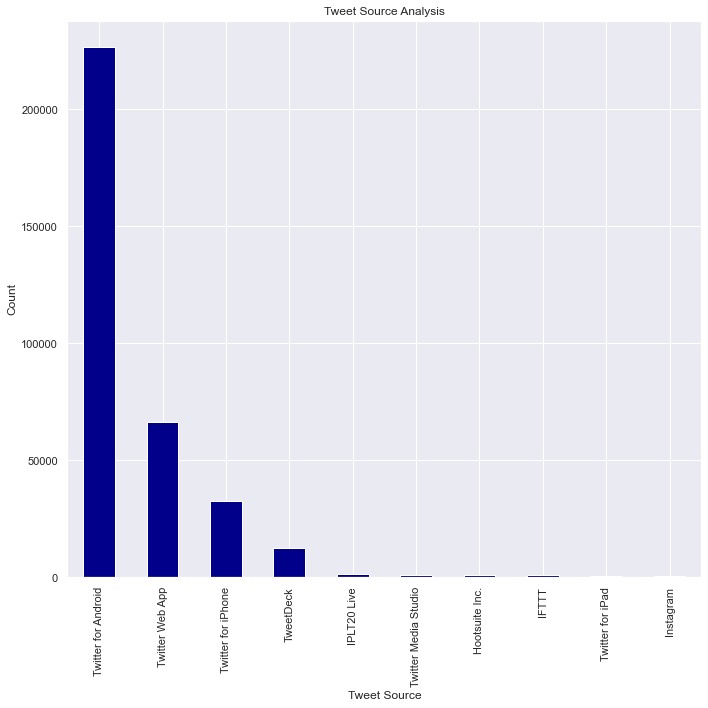

In [110]:
# Plotting the graph
plt.figure(figsize=(10, 10))
source_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.title('Tweet Source Analysis')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [111]:
# Creating a conclusion DataFrame
conclusion_df = pd.DataFrame({'Tweet Source': source_counts.index, 'Count': source_counts.values})

# Printing the conclusion DataFrame
print("Tweet Source Analysis:")
conclusion_df

Tweet Source Analysis:


,Tweet Source,Count
0,Twitter for Android,226512
1,Twitter Web App,66231
2,Twitter for iPhone,32412
3,TweetDeck,12358
4,IPLT20 Live,1178
5,Twitter Media Studio,1047
6,Hootsuite Inc.,935
7,IFTTT,854
8,Twitter for iPad,621
9,Instagram,607


**5.Finding out the number of TWEETS per hours**

In [112]:
# Converting 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extracting hour and day of the week
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

# Calculating tweet count by hour
hourly_tweet_counts = df['hour'].value_counts().sort_index()

# Calculating tweet count by day of the week
daily_tweet_counts = df['day_of_week'].value_counts()

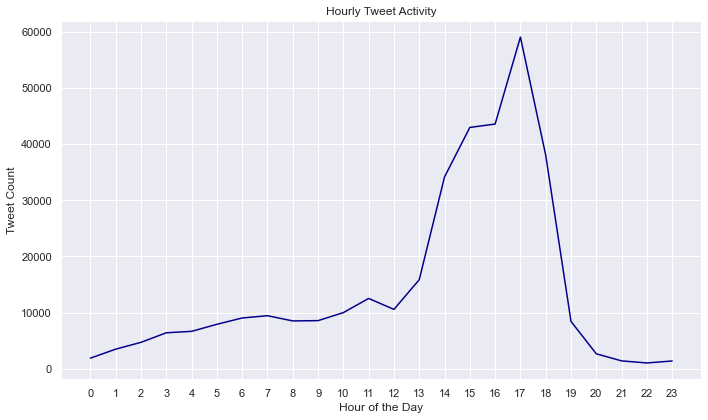

In [113]:
# Plotting the hourly tweet activity
plt.figure(figsize=(10, 6))
hourly_tweet_counts.plot(kind='line', color='darkblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.title('Hourly Tweet Activity')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [114]:
# Calculating tweet count by hour
hourly_tweet_counts = df['hour'].value_counts().sort_index()

# Creating the conclusion DataFrame
hourly_conclusion_df = pd.DataFrame({'Hour of the Day': hourly_tweet_counts.index, 'Tweet Count': hourly_tweet_counts.values})

# Printing the conclusion DataFrame
print("Hourly Tweet Activity:")
hourly_conclusion_df

Hourly Tweet Activity:


,Hour of the Day,Tweet Count
0,0,1898
1,1,3499
2,2,4711
3,3,6411
4,4,6665
5,5,7921
6,6,9041
7,7,9449
8,8,8520
9,9,8573


In [115]:
# Printing the conclusion DataFrame for daily tweet activity
daily_conclusion_df = pd.DataFrame({'Day of the Week': daily_tweet_counts.index, 'Tweet Count': daily_tweet_counts.values})
print("Daily Tweet Activity:")
daily_conclusion_df

Daily Tweet Activity:


,Day of the Week,Tweet Count
0,Wednesday,57463
1,Thursday,57197
2,Saturday,56212
3,Friday,53708
4,Tuesday,45878
5,Monday,40483
6,Sunday,37279


**6.To chech whether the user is verified or not**

In [116]:
# Calculating the proportion of verified users
verified_users = df['user_verified'].value_counts(normalize=True) * 100

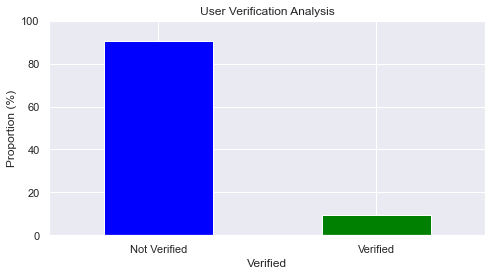

In [117]:
# Plotting the analysis
plt.figure(figsize=(7, 4))
verified_users.plot(kind='bar', color=['blue', 'green'])
plt.title('User Verification Analysis')
plt.xlabel('Verified')
plt.ylabel('Proportion (%)')
plt.xticks([0, 1], ['Not Verified', 'Verified'], rotation=0)
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

In [118]:
# Creating the conclusion DataFrame
conclusion_df = pd.DataFrame({'Verification Status': verified_users.index, 'Proportion (%)': verified_users.values})

# Printing the conclusion DataFrame
print("User Verification Analysis:")
conclusion_df

User Verification Analysis:


,Verification Status,Proportion (%)
0,False,90.56516
1,True,9.43484


**7.To check the TWEETS is RETWEETS or NOT**

In [119]:
# Calculating the percentage of retweets
retweet_percentage = (df['is_retweet'].sum() / len(df)) * 100

# Calculating the percentage of original tweets
original_tweet_percentage = 100 - retweet_percentage

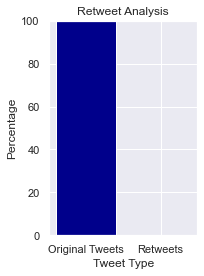

In [120]:
# Plotting the analysis
plt.figure(figsize=(3, 4))
plt.bar(['Original Tweets', 'Retweets'], [original_tweet_percentage, retweet_percentage], color=['darkblue', 'gray'])
plt.title('Retweet Analysis')
plt.xlabel('Tweet Type')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.tight_layout()

# Show the plot
plt.show()

In [121]:
# Creating the conclusion DataFrame
conclusion_df = pd.DataFrame({'Tweet Type': ['Original Tweets', 'Retweets'],
                              'Percentage': [original_tweet_percentage, retweet_percentage]})

# Printing the conclusion DataFrame
print("Retweet Analysis:")
conclusion_df

Retweet Analysis:


,Tweet Type,Percentage
0,Original Tweets,100.0
1,Retweets,0.0


**8.Average Sentiment scored by sentiment**

In [122]:
# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Applying sentiment analysis on each text in the DataFrame and store the sentiment scores in a new column:
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Classify the sentiment based on the sentiment score and store it in a new column:
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
# Calculating average sentiment score by sentiment
average_sentiment = df.groupby('sentiment')['sentiment_score'].mean()

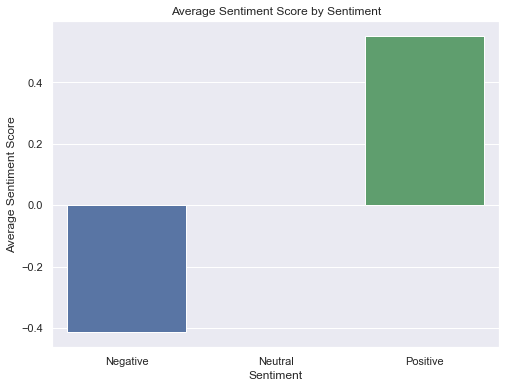

In [123]:
# Ploting average sentiment score by sentiment
plt.figure(figsize=(8, 6))
sns.barplot(x=average_sentiment.index, y=average_sentiment.values)
plt.xlabel('Sentiment')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Sentiment')
plt.show()

**9.Plotting sentiment score distribution**

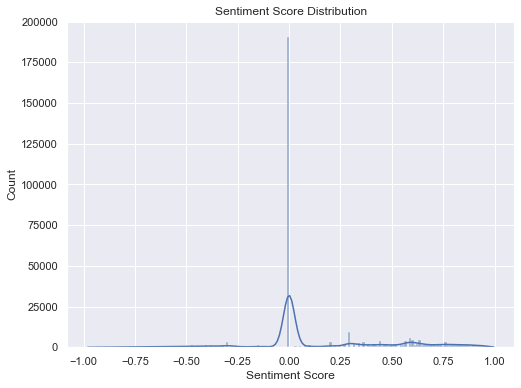

In [124]:
# Ploting sentiment score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Score Distribution')
plt.show()

**10.The graph for Sentiment distribution by source**

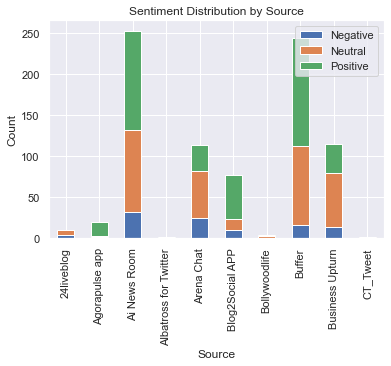

In [125]:
sentiment_by_source = df.groupby('source')['sentiment'].value_counts().unstack().head(10)
sentiment_by_source.plot(kind='bar', stacked=True)
# plt.figure(figsize=(8,5))
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Source')
plt.legend(loc='upper right')
plt.show()

**11.Sentiment distribution by user FOLLOWERS**

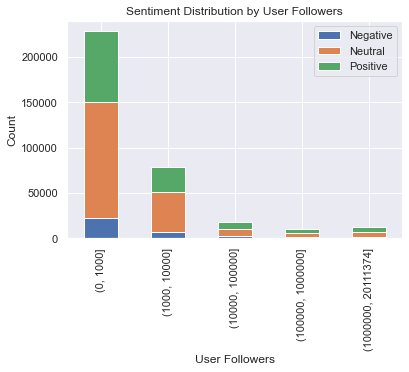

In [126]:
df['user_followers'] = df['user_followers'].astype(int)
df['followers_bin'] = pd.cut(df['user_followers'], bins=[0, 1000, 10000, 100000, 1000000, df['user_followers'].max()])
sentiment_by_followers = df.groupby('followers_bin')['sentiment'].value_counts().unstack()
sentiment_by_followers.plot(kind='bar', stacked=True)
plt.xlabel('User Followers')
plt.ylabel('Count')
plt.title('Sentiment Distribution by User Followers')
plt.legend(loc='upper right')
plt.show()